<table align="right" width=100%>
    <tr>
        <td width="20%">
            <img src="hcg-logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                  <b> CAPSTONE PROJECT DSE </b> 
                </font>
            </div>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Home Credit Part 2: Extensive EDA and Data Pre-Processing </b>
                </font>
             </div>
        </td>
    </tr>
</table>

# Welcome to Part 2 of the Capstone Project 

By now we have managed to extract 57 new features from the additional tables provided to us by home credit and also we handled the null values in our dataset by creating two different datasets and finally generated two new CSV files:
- application_data_cleaned_1.csv
- application_data_cleaned_2.csv

**Now, Our next big challenge is to perform EDA on our features to have better insights to our data and gather as much information as possible. And also we will try to perform round 2 of feature engineering as well.**

Post that, we will ready our datasets for machine learning models and start building model and examine our performance in upcoming notebooks.

<a id="home"></a>
## Table of Content (...in continuation)

**[Import Libraries](#lib)**

4. **[Variable categorization (count of numeric and categorical)](#count)**
5. **[Understanding our TARGET Variable](#target)**
6. **[Exploring and Manoeuvring the Dataset](#eda)**
    - 6.1 - **[Exploring Categorical Features](#cat)**
    - 6.2 - **[Handling Numerical Features](#num)**
        - 6.2.1 - **[Dropping Features with Less Variance](#var)**
        - 6.2.2 - **[Checking Outliers and dropping few extreme outliers](#outliers)**
    - 6.3 - **[Feature Engineering: Creating New Features and Modifying existing ones](#feateng)**
        - 6.3.1 - **[Identifying anomalies in DAYS Features](#days)**
        - 6.3.2 - **[Simplifying Categorical Features](#catsim)**
        - 6.3.3 - **[Creating Flag Variables for Bureau, Credit Card, and previous loan accounts](#flag)**
        - 6.3.4 - **[Creating Domain Features based on Ratios](#domain)**
    - 6.4 - **[Final Data Processing and Preparation for Our ML Models](#transform)**
        - 6.4.1 - **[Segregating Binary Numeric Features](#bin)**
        - 6.4.2 - **[Handling skewness and Applying Transformation of Float type numerical features](#skew)**
        - 6.4.3 - **[Scaling the Float type numerical features](#scale)**
7. **[Bulding Base Models using Cleaned Datset 1](#base)**
    - 7.1 - **[Logistic Regression](#lr)**
    - 7.2 - **[Decision Tree](#dt)**
    - 7.3 - **[Naive Bayes](#nb)**
    
8. **[Bulding Base Models using Cleaned Datset 2](#base2)**
    - 8.1 - **[Logistic Regression](#lr2)**
    - 8.2 - **[Decision Tree](#dt2)**
    - 8.3 - **[Naive Bayes](#nb2)**

### Handling Multicollinearity and Feature Selection from Base Models in next notebook

<a id="lib"> </a>

# Importing Libraries and Loading Cleaned Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore') 

#for displaying max columns
pd.pandas.set_option('display.max_columns', None)

In [3]:
from scipy.stats import chi2_contingency

In [4]:
application_data_cleaned_1=pd.read_csv('application_data_cleaned_1.csv')

In [5]:
application_data_cleaned_2 = pd.read_csv('application_data_cleaned_2.csv')

In [177]:
#application_data_cleaned_1['DEBT_PERCENT'] = application_data_cleaned_1['DEBT_PERCENT'].apply((lambda x: 0 if (x==np.inf or x== -(np.inf)) else x))

#application_data_cleaned_1['OVERDUE_DEBT_PERCENT'] = application_data_cleaned_1['OVERDUE_DEBT_PERCENT'].apply((lambda x: 0 if (x==np.inf or x== -(np.inf)) else x))

In [7]:
application_data_cleaned_1.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
application_data_cleaned_2.drop('Unnamed: 0',axis=1, inplace=True)

In [10]:
application_data_cleaned_1.shape, application_data_cleaned_2.shape

((212870, 130), (92646, 177))

In [12]:
application_data_cleaned_1.head()

,Unnamed: 0.1,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,AVG_DAYS_DIFF,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,AVG_DAYS_DECISION_prev,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cars,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,OCCUPATION_TYPE_ENCODED
0,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0000,0.0000,189037.8,0.000000,0.0,0.0,459.000000,0.0,0.0,0.0,1.0,-815.000000,0.0,5357.25,0.00,24282.00,0.00,20106.00,0.00,24282.00,0.00,4.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,75.000000,25.000000,100.0000,3.0,1.0,100.0000,0
1,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.509149,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,9.0,-272.444444,0.0,23651.18,13623.58,272203.26,286175.13,291695.50,333337.35,408304.89,253670.60,23.00,20.23,5.0,2.0,2.0,5.0,3.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,8.0,1.0,0.0,3.0,2.0,2.0,2.0,1.0,6.0,100.0,270000.0,100.0,0.0,21.0,3.0,85.714286,9.523810,100.0000,16.0,3.0,100.0000,0
2,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,

In [13]:
#removing junk columns created. # RUN THIS CELL ONLY ONCE

application_data_cleaned_1.drop('Unnamed: 0.1',axis=1, inplace=True)

application_data_cleaned_2.drop('Unnamed: 0.1',axis=1, inplace=True)

<a id="func"></a>
# Functions for Ease of Coding

## a. Function to plot a confusion matrix

In [4]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

## b. Function to plot a roc_auc_curve 

In [5]:
   
def plot_roc_auc(model, X_test, y_test):

    plt.figure(figsize=(10,6))
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    #model

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Loan Defaulter Prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## c. Function to Return scaled and dummy for X and y for Model Building

In [6]:
def dataset_processing(df, encoding='ohe',scaling='standard'):
    print("Shape of the Dataset Provided: ", df.shape)
    
    #scaling numeric features
    df_num = df.select_dtypes('number')
    num_cols =df_num.nunique()
    binary_cols = num_cols[num_cols<4].index
    df_num = df_num.drop(binary_cols, axis=1)
    
    if scaling=='minmax':
        
        from sklearn.preprocessing import MinMaxScaler
        
        mm = MinMaxScaler(feature_range = (0, 1))
        scaled = mm.fit_transform(df_num)
        
        df_scaled = pd.DataFrame(scaled, columns=df_num.columns)
        print("MinaMax Scaling Done...")
        
    elif scaling=='standard':
        df_scaled = (df_num - df_num.mean())/df_num.std()
        print("Standard Scaling Done...")
    
    elif scaling=='no':
        # not applying scaling
        df_scaled = df_num
        print("Not applying Scaling...")
        
    # Catch error if scaling scheme is not valid
    else:
        raise ValueError("Scaling must be either 'minmax' or 'standard' or 'no'")
        
        
    #creating dummies:
    df_cat = df.select_dtypes('object')
    
    if encoding=='ohe':
        df_cat = pd.get_dummies(df_cat, drop_first=True)
        print('Dummies Created...')
        
    # Integer label encoding
    elif encoding == 'le':
        
        from sklearn.preprocessing import LabelEncoder
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # Iterate through each column
        for col in df_cat.columns:
            df_cat[col] = label_encoder.fit_transform(np.array(df_cat[col].astype(str)).reshape((-1,)))
        
        print("Label Encoding Done...")
                
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
        
    df_final = pd.concat([df_scaled, df_cat],axis=1,join='inner')
    df_final = pd.concat([df[binary_cols], df_final], axis=1, join='inner')
    
    print("Processed Datset Shape: ", df_final.shape)
    
    X = df_final.drop('TARGET',axis=1)
    y = df_final['TARGET']
    
    return X, y

## d. Model Building Pipeline Function (latest version)

In [7]:
def build_model_pipeline(model_name, X,y, plot_graphs=False,feature_importance = False,over_sampling=False):
    
    # For over sampling
    if over_sampling==True:
        oversample = SMOTE()
        X, y = oversample.fit_resample(X, y)
        print('Over Sampling Done using SMOTE')
    
    
    X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)
    print('Train Test Split Done...')

    #X_train.shape , X_test.shape, y_train.shape, y_test.shape
    
    model = model_name

    model.fit(X_train,y_train)
    print('Model Fitted...')

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot_graphs==True:
        
        print(classification_report(y_train, y_pred_train))
        
        print(classification_report(y_test, y_pred_test))
        
        #train matrix
        plot_confusion_matrix(model, X_train, y_train)
        #test matrix
        plot_confusion_matrix(model, X_test, y_test)
        # train roc
        plot_roc_auc(model, X_train, y_train)
        # test roc
        plot_roc_auc(model, X_test, y_test)
         
    else:
        print(classification_report(y_train, y_pred_train))
        print(classification_report(y_test, y_pred_test))
    
    # saving performance metrics for the mode
    
    eval_metrics = [accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test), roc_auc_score(y_test, y_pred_prob)]
    
    if feature_importance == True:
        important_features = pd.DataFrame({'Features': X_train.columns, 
                                       'Importance': model.feature_importances_})
        # sort the dataframe in the descending order according to the feature importance
        
        df_feature_importance = important_features.sort_values('Importance', ascending = False)

        return df_feature_importance, eval_metrics
    
    else: 
        return eval_metrics

## g. Dataframes for saving various combination of Model Scores

In [8]:
# for saving result of all models

base_model_scores = pd.DataFrame(columns=['Accuracy_score', 'Recall_score','F1_score', 'ROC_AUC_Score'])
# for saving result of all models on dataset 2

base_model_scores_2 = pd.DataFrame(columns=['Accuracy_score', 'Recall_score','F1_score', 'ROC_AUC_Score'])


<a id="eda" > </a>
# Exploring and cleaning the Features: Categorical & Numericals

<a id="cat" > </a>
# [6.1 Handling Categorical Features](#home)

In [10]:
df_cat1=df_1.select_dtypes('object')

In [11]:
df_cat1.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
2,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
3,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Other
4,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,SUNDAY,Business Entity Type 3


## We have 11 categorical columns

**Taking columns one by one to analyse**

In [13]:
df_cat1.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [14]:
len(df_cat1.columns)

11

In [15]:
### Adding target variable

df_cat1['TARGET'] = application_data_cleaned_1['TARGET']

In [16]:
df_cat1.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,TARGET
0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government,0
1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3,0
2,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion,0


In [15]:
def tar(a):
    if a==0:
        return ('NO')
    else:
        return ('YES')

In [16]:
df_cat['TARGET']=df_cat['TARGET'].apply(tar)

In [17]:
df_cat['TARGET'].unique()

array(['NO', 'YES'], dtype=object)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

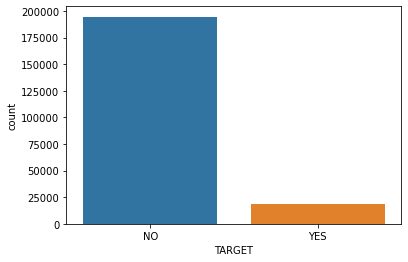

In [18]:
sns.countplot(df_cat['TARGET'])

## 1. HYPOTHESIS TESTING

### H0: Target and Loan Type are independent
### H1: Target and Loan Type have some relation

### 1.1 NAME_CONTRACT_TYPE

In [17]:
df_cat1['NAME_CONTRACT_TYPE'].unique()

array(['Revolving loans', 'Cash loans'], dtype=object)

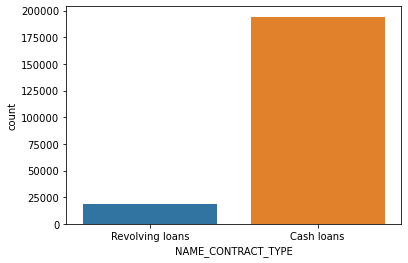

In [18]:
sns.countplot(df_cat1['NAME_CONTRACT_TYPE'])
plt.show()

### Checking dependency of this variable with target variable

In [21]:
NAME_CONTRACT_TYPE_Effect=pd.crosstab(df_cat['NAME_CONTRACT_TYPE'],df_cat['TARGET'])

In [22]:
NAME_CONTRACT_TYPE_Effect

TARGET,NO,YES
NAME_CONTRACT_TYPE,,
Cash loans,176973,17151
Revolving loans,17592,1154


In [23]:
chi2_contingency(NAME_CONTRACT_TYPE_Effect)

(155.77406933175894,
 9.485025947388133e-36,
 1,
 array([[177430.99572509,  16693.00427491],
        [ 17134.00427491,   1611.99572509]]))

In [24]:
### pval is  9.485025947388133e-36 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 1.2 CODE_GENDER

In [25]:
df_cat['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [26]:
df_cat['CODE_GENDER'].value_counts()

F      139092
M       73775
XNA         3
Name: CODE_GENDER, dtype: int64

In [27]:
### As there are only 3 rows containing XNA we can impute these rows with mode.

df_cat.loc[(df_cat.CODE_GENDER=='XNA'),'CODE_GENDER']='F'

In [28]:
df_cat['CODE_GENDER'].value_counts()

F    139095
M     73775
Name: CODE_GENDER, dtype: int64

In [29]:
CODE_GENDER_Effect=pd.crosstab(df_cat['CODE_GENDER'],df_cat['TARGET'])

In [30]:
CODE_GENDER_Effect

TARGET,NO,YES
CODE_GENDER,,
F,128713,10382
M,65852,7923


In [31]:
chi2_contingency(CODE_GENDER_Effect)

(657.6075319860579,
 4.950368726678559e-145,
 1,
 array([[127134.01923709,  11960.98076291],
        [ 67430.98076291,   6344.01923709]]))

In [32]:
### pval is 4.950368726678559e-145 i.e. it very very less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

In [33]:
## Analysing dependency of gender on target variable

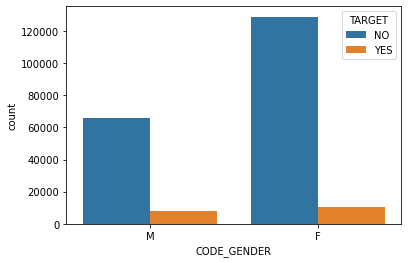

In [34]:
sns.countplot(df_cat['CODE_GENDER'],hue=df_cat['TARGET'])
plt.show()

## 1.3 FLAG_OWN_CAR

In [35]:
df_cat['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [36]:
df_cat['FLAG_OWN_CAR'].isnull().sum()

0

In [37]:
df_cat['FLAG_OWN_CAR'].value_counts()

N    139435
Y     73435
Name: FLAG_OWN_CAR, dtype: int64

In [38]:
FLAG_OWN_CAR_Effect=pd.crosstab(df_cat['FLAG_OWN_CAR'],df_cat['TARGET'])

In [39]:
FLAG_OWN_CAR_Effect

TARGET,NO,YES
FLAG_OWN_CAR,,
N,126758,12677
Y,67807,5628


In [40]:
chi2_contingency(FLAG_OWN_CAR_Effect)

(124.5774472605942,
 6.297273953044155e-29,
 1,
 array([[127444.78214403,  11990.21785597],
        [ 67120.21785597,   6314.78214403]]))

In [41]:
### pval is 6.297273953044155e-29 i.e. it very very less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 1.4 FLAG_OWN_REALTY

In [42]:
df_cat['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [43]:
df_cat['FLAG_OWN_REALTY'].isnull().sum()

0

In [44]:
FLAG_OWN_REALTY_Effect=pd.crosstab(df_cat['FLAG_OWN_REALTY'],df_cat['TARGET'])

In [45]:
FLAG_OWN_REALTY_Effect

TARGET,NO,YES
FLAG_OWN_REALTY,,
N,60149,5873
Y,134416,12432


In [46]:
chi2_contingency(FLAG_OWN_REALTY_Effect)

(10.64116949373362,
 0.0011059771353802428,
 1,
 array([[ 60344.67247616,   5677.32752384],
        [134220.32752384,  12627.67247616]]))

In [47]:
### pval is 0.0011 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 1.5 NAME_TYPE_SUITE

In [19]:
df_cat1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      170983
Family              29240
Spouse, partner      8290
Children             2316
Other_B              1272
Other_A               575
Group of people       194
Name: NAME_TYPE_SUITE, dtype: int64

In [139]:
## combining the sub categories into major categories.

def suit(a):
    if ((a=='Spouse, partner') | (a=='Children') |(a=='Family')):
        return ('Family')
    elif a=='Unaccompanied':
        return a
    else:
        return ('Others')

In [21]:
df_cat1['NAME_TYPE_SUITE'].isnull().sum()

0

In [22]:
df_cat1['NAME_TYPE_SUITE'] = df_cat1['NAME_TYPE_SUITE'].apply(suit)

In [23]:
df_cat1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied    170983
Family            39846
Others             2041
Name: NAME_TYPE_SUITE, dtype: int64

In [53]:
## Hypothesis testing

NAME_TYPE_SUITE_Effect=pd.crosstab(df_cat['NAME_TYPE_SUITE'],df_cat['TARGET'])

In [54]:
NAME_TYPE_SUITE_Effect

TARGET,NO,YES
NAME_TYPE_SUITE,,
Family,36680,3166
Others,1837,204
Unaccompanied,156048,14935


In [55]:
chi2_contingency(NAME_TYPE_SUITE_Effect)

(30.717093678603522,
 2.137311672803774e-07,
 2,
 array([[ 36419.58467609,   3426.41532391],
        [  1865.49145018,    175.50854982],
        [156279.92387373,  14703.07612627]]))

In [56]:
### pval is 2.137311672803774e-07 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

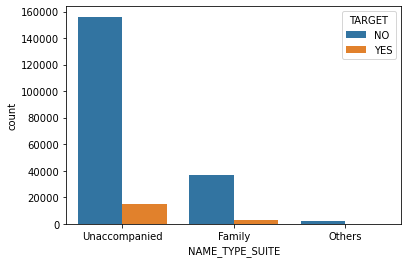

In [57]:
sns.countplot(df_cat['NAME_TYPE_SUITE'],hue=df_cat['TARGET'])
plt.show()

## 1.6 NAME_INCOME_TYPE

In [24]:
df_cat1['NAME_INCOME_TYPE'].value_counts()

Working                 112265
Commercial associate     46536
Pensioner                38633
State servant            15400
Student                     14
Unemployed                  12
Businessman                  5
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [140]:
## reducing the minority values to highest class

def income(a):
    if ((a=='Student') | (a=='Unemployed') | (a=='Maternity leave') | (a=='Businessman')):
        return ('Working')
    else:
        return a

In [26]:
df_cat1['NAME_INCOME_TYPE']=df_cat1['NAME_INCOME_TYPE'].apply(inc)

In [27]:
df_cat1['NAME_INCOME_TYPE'].value_counts()

Working                 112301
Commercial associate     46536
Pensioner                38633
State servant            15400
Name: NAME_INCOME_TYPE, dtype: int64

In [28]:
## Hypothesis Testing

NAME_INCOME_TYPE_Effect=pd.crosstab(df_cat1['NAME_INCOME_TYPE'],df_cat1['TARGET'])

In [29]:
NAME_INCOME_TYPE_Effect

TARGET,0,1
NAME_INCOME_TYPE,,
Commercial associate,42740,3796
Pensioner,36443,2190
State servant,14449,951
Working,100933,11368


In [30]:
chi2_contingency(NAME_INCOME_TYPE_Effect)

(880.4775932047299,
 1.5188383092708168e-190,
 3,
 array([[ 42534.30187438,   4001.69812562],
        [ 35310.89230516,   3322.10769484],
        [ 14075.73166721,   1324.26833279],
        [102644.07415324,   9656.92584676]]))

In [66]:
### pval is 9.957486468847377e-191 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

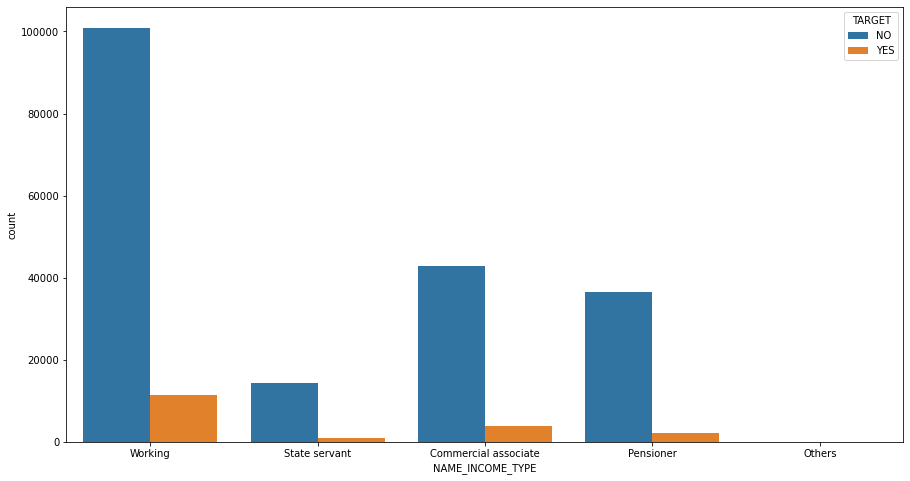

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(df_cat['NAME_INCOME_TYPE'],hue=df_cat['TARGET'])
plt.show()

## 1.7 NAME_EDUCATION_TYPE

In [68]:
df_cat['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [69]:
df_cat['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    155939
Higher education                  47177
Incomplete higher                  6621
Lower secondary                    3036
Academic degree                      97
Name: NAME_EDUCATION_TYPE, dtype: int64

In [141]:
## Combining sub-categories

def edu(a):
    if ((a=='Secondary / secondary special') | (a=='Incomplete higher')):
        return ('Secondary_Education')
    elif a=='Lower secondary':
        return ('Lower_Education')
    else:
        return ('Higher_Education')

In [71]:
df_cat1['NAME_EDUCATION_TYPE'].isnull().sum()

0

In [32]:
df_cat1['NAME_EDUCATION_TYPE']=df_cat1['NAME_EDUCATION_TYPE'].apply(edu)

In [33]:
df_cat1['NAME_EDUCATION_TYPE'].value_counts()

Secondary_Education    162560
Higher_Education        47274
Lower_Education          3036
Name: NAME_EDUCATION_TYPE, dtype: int64

In [74]:
## Hypothesis Testing

NAME_EDUCATION_TYPE_Effect=pd.crosstab(df_cat['NAME_EDUCATION_TYPE'],df_cat['TARGET'])

In [75]:
NAME_EDUCATION_TYPE_Effect

TARGET,NO,YES
NAME_EDUCATION_TYPE,,
Higher_Education,44594,2680
Lower_Education,2683,353
Secondary_Education,147288,15272


In [76]:
chi2_contingency(NAME_EDUCATION_TYPE_Effect)

(682.6972989409313,
 5.677604413873164e-149,
 2,
 array([[ 43208.84018415,   4065.15981585],
        [  2774.92995725,    261.07004275],
        [148581.2298586 ,  13978.7701414 ]]))

In [77]:
### pval is 5.677604413873164e-149 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 1.8 NAME_FAMILY_STATUS

In [34]:
df_cat1['NAME_FAMILY_STATUS'].value_counts()

Married                 139014
Single / not married     29807
Civil marriage           20480
Separated                12735
Widow                    10834
Name: NAME_FAMILY_STATUS, dtype: int64

In [142]:
## Combining sub-categories

def marr(a):
     if ((a=='Civil marriage') | (a=='Married')):
        return ('Married')
     elif a=='Single / not married':
        return ('Unmarried')
     else:
        return 'Separated/Widow'

In [36]:
df_cat1['NAME_FAMILY_STATUS']=df_cat1['NAME_FAMILY_STATUS'].apply(marr)

In [37]:
df_cat1['NAME_FAMILY_STATUS'].value_counts()

Married            159494
Unmarried           29807
Separated/Widow     23569
Name: NAME_FAMILY_STATUS, dtype: int64

In [81]:
df_cat1['NAME_FAMILY_STATUS'].value_counts()

Married        159494
Not Married     29807
Separated       12735
Widow           10834
Name: NAME_FAMILY_STATUS, dtype: int64

In [82]:
## Hypothesis Testing

NAME_FAMILY_STATUS_Effect = pd.crosstab(df_cat1['NAME_FAMILY_STATUS'],df_cat1['TARGET'])

In [83]:
NAME_FAMILY_STATUS_Effect

TARGET,NO,YES
NAME_FAMILY_STATUS,,
Married,146159,13335
Not Married,26631,3176
Separated,11633,1102
Widow,10142,692


In [84]:
chi2_contingency(NAME_FAMILY_STATUS_Effect)

(239.33043444261392,
 1.3283083282172193e-51,
 3,
 array([[145778.87964485,  13715.12035515],
        [ 27243.85284446,   2563.14715554],
        [ 11639.89888195,   1095.10111805],
        [  9902.36862874,    931.63137126]]))

In [38]:
### pval is 1.3283083282172193e-51 i.e. it less than 0.05 means H0 is rejected.

In [39]:
## Hypothesis Testing

NAME_FAMILY_STATUS_Effect=pd.crosstab(df_cat1['NAME_FAMILY_STATUS'],df_cat1['TARGET'])

In [40]:
chi2_contingency(NAME_FAMILY_STATUS_Effect)

(201.08602568647984,
 2.1613461571948052e-44,
 2,
 array([[145778.87964485,  13715.12035515],
        [ 21542.26751069,   2026.73248931],
        [ 27243.85284446,   2563.14715554]]))

**Therefore they both have Relation.**

## 1.9 NAME_HOUSING_TYPE

In [86]:
df_cat['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [87]:
df_cat1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      188741
With parents            10787
Municipal apartment      6848
Rented apartment         3894
Office apartment         1846
Co-op apartment           754
Name: NAME_HOUSING_TYPE, dtype: int64

In [143]:
## reducing classes

def houses(a):
     if a=='House / apartment':
        return ('Own House')
     else:
        return ('Rented/Others')

In [42]:
df_cat1['NAME_HOUSING_TYPE'] = df_cat1['NAME_HOUSING_TYPE'].apply(houses)

In [43]:
df_cat1['NAME_HOUSING_TYPE'].value_counts()

Own House        188741
Rented/Others     24129
Name: NAME_HOUSING_TYPE, dtype: int64

In [91]:
## Hypothesis Testing

NAME_HOUSING_TYPE_Effect=pd.crosstab(df_cat['NAME_HOUSING_TYPE'],df_cat['TARGET'])

In [92]:
NAME_HOUSING_TYPE_Effect

TARGET,NO,YES
NAME_HOUSING_TYPE,,
Own House,173076,15665
Rented/Others,21489,2640


In [93]:
chi2_contingency(NAME_HOUSING_TYPE_Effect)

(189.585021198115,
 3.9166292051081684e-43,
 1,
 array([[172510.88770141,  16230.11229859],
        [ 22054.11229859,   2074.88770141]]))

In [94]:
### pval is 3.9166292051081684e-43 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 1.10 WEEKDAY_APPR_PROCESS_START

In [95]:
df_cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'TARGET'],
      dtype='object')

In [44]:
df_cat1['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      37440
WEDNESDAY    36106
THURSDAY     35077
FRIDAY       35008
MONDAY       34920
SATURDAY     23188
SUNDAY       11131
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [97]:
### Reducing classes

def week(a):
     if ((a=='SUNDAY') | (a=='SATURDAY')):
        return ('PROCESS_START_WEEKEND')
     else:
        return ('PROCESS_START_WEEKDAY')

In [98]:
df_cat['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      37440
WEDNESDAY    36106
THURSDAY     35077
FRIDAY       35008
MONDAY       34920
SATURDAY     23188
SUNDAY       11131
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [99]:
df_cat['WEEKDAY_APPR_PROCESS_START']=df_cat['WEEKDAY_APPR_PROCESS_START'].apply(week)

In [100]:
df_cat['WEEKDAY_APPR_PROCESS_START'].value_counts()

PROCESS_START_WEEKDAY    178551
PROCESS_START_WEEKEND     34319
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [46]:
## Hypothesis Testing

WEEKDAY_APPR_PROCESS_START_Effect=pd.crosstab(df_cat1['WEEKDAY_APPR_PROCESS_START'],df_cat1['TARGET'])

In [47]:
WEEKDAY_APPR_PROCESS_START_Effect

TARGET,0,1
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,31965,3043
MONDAY,32024,2896
SATURDAY,21260,1928
SUNDAY,10173,958
THURSDAY,32023,3054
TUESDAY,34155,3285
WEDNESDAY,32965,3141


In [48]:
chi2_contingency(WEEKDAY_APPR_PROCESS_START_Effect)

(9.36634771579421,
 0.1539989129047417,
 6,
 array([[31997.61131207,  3010.38868793],
        [31917.17855968,  3002.82144032],
        [21194.03025321,  1993.96974679],
        [10173.82916804,   957.17083196],
        [32060.67790201,  3016.32209799],
        [34220.48010523,  3219.51989477],
        [33001.19269977,  3104.80730023]]))

In [104]:
### pval is  0.1741547315389037 i.e. it GREATER than 0.05 means H0 is ACCEPTED.

**Therefore they both have NO Relation. Therefore we can drop this variable**

In [105]:
## Dropping the variale

df_cat=df_cat.drop(['WEEKDAY_APPR_PROCESS_START'],axis=1)

In [106]:
df_cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE',
       'TARGET'],
      dtype='object')

## 1.11 ORGANIZATION_TYPE

In [107]:
df_cat['ORGANIZATION_TYPE'].unique()

array(['Government', 'Business Entity Type 3', 'Religion', 'Other', 'XNA',
       'Electricity', 'Medicine', 'Business Entity Type 2',
       'Construction', 'Kindergarten', 'Self-employed', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Transport: type 4',
       'Industry: type 1', 'Transport: type 2', 'School', 'Emergency',
       'University', 'Business Entity Type 1', 'Postal',
       'Transport: type 3', 'Housing', 'Industry: type 4', 'Agriculture',
       'Restaurant', 'Hotel', 'Industry: type 7', 'Trade: type 3',
       'Trade: type 2', 'Bank', 'Industry: type 3', 'Industry: type 9',
       'Insurance', 'Transport: type 1', 'Police', 'Security',
       'Industry: type 12', 'Security Ministries', 'Mobile',
       'Industry: type 5', 'Trade: type 6', 'Advertising',
       'Legal Services', 'Industry: type 10', 'Cleaning',
       'Industry: type 13', 'Industry: type 2', 'Industry: type 8',
       'Realtor', 'Culture', 'Trade: type 1', 'Telecom',
       'Indu

In [108]:
df_cat['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    45000
XNA                       38640
Self-employed             28076
Other                     11719
Medicine                   7772
Government                 7559
Business Entity Type 2     6876
School                     6608
Trade: type 7              5549
Kindergarten               4831
Construction               4652
Business Entity Type 1     4006
Transport: type 4          3565
Industry: type 3           2503
Trade: type 3              2363
Security                   2288
Agriculture                2248
Industry: type 9           2182
Housing                    2042
Industry: type 11          1832
Military                   1802
Postal                     1659
Police                     1624
Bank                       1541
Transport: type 2          1508
Security Ministries        1347
Restaurant                 1338
Trade: type 2              1174
Services                   1016
Transport: type 3           848
Industry: type 7            829
Universi

In [144]:
## Reducing classes

def organization(a):
     if ((a=='University') | (a=='School') | (a=='Kindergarten')):
        return ('EDUCATION')
     elif a=='Self-employed':
        return ('Self-employed')
     elif ((a=='Industry: type 1') | (a=='Industry: type 2') | (a=='Industry: type 3') | (a=='Industry: type 4') | (a=='Industry: type 5') | (a=='Industry: type 6') | (a=='Industry: type 7') | (a=='Industry: type 8') | (a=='Industry: type 9') | (a=='Industry: type 10') | (a=='Industry: type 11') | (a=='Industry: type 12') | (a=='Industry: type 13')):
        return ('INDUSTRY')
     elif ((a=='Business Entity Type 1') | (a=='Business Entity Type 2') | (a=='Business Entity Type 3')):
        return ('Business')
     else:
        return ('OTHERS')

In [50]:
df_cat1['ORGANIZATION_TYPE']=df_cat1['ORGANIZATION_TYPE'].apply(organization)

In [51]:
df_cat1['ORGANIZATION_TYPE'].value_counts()

OTHERS           106945
Business          55882
Self-employed     28076
EDUCATION         12252
INDUSTRY           9715
Name: ORGANIZATION_TYPE, dtype: int64

In [112]:
## Hypothesis Testing

ORGANIZATION_TYPE_Effect=pd.crosstab(df_cat['ORGANIZATION_TYPE'],df_cat['TARGET'])

In [113]:
ORGANIZATION_TYPE_Effect

TARGET,NO,YES
ORGANIZATION_TYPE,,
Business,50429,5453
EDUCATION,11415,837
INDUSTRY,8796,919
OTHERS,98840,8105
Self-employed,25085,2991


In [114]:
chi2_contingency(ORGANIZATION_TYPE_Effect)

(445.7662434067477,
 3.573645662238222e-95,
 4,
 array([[51076.62578099,  4805.37421901],
        [11198.43275238,  1053.56724762],
        [ 8879.59306149,   835.40693851],
        [97748.64436041,  9196.35563959],
        [25661.70404472,  2414.29595528]]))

In [115]:
### pval is 3.573645662238222e-95 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

# Taking Another DataSet 'Cleaned_2'

In [136]:
application_data_cleaned_2=pd.read_csv('application_data_cleaned_2.csv')

In [137]:
application_data_cleaned_2.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,AVG_DAYS_DIFF,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,AVG_DAYS_DECISION_prev,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cars,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,OCCUPATION_TYPE_ENCODED_Imputed
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,

In [138]:
df2_cat=application_data_cleaned_2.select_dtypes('object')

In [139]:
df2_cat.shape

(92646, 15)

In [120]:
df2_cat['TARGET']=application_data_cleaned_2['TARGET']

In [121]:
df2_cat['TARGET']=df2_cat['TARGET'].apply(tar)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

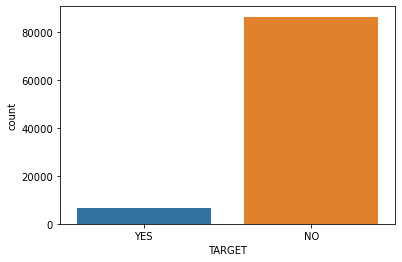

In [122]:
sns.countplot(df2_cat['TARGET'])

In [123]:
## Array containing categorical variabled from cleaned_2 dataset
cleaned_2_cat=df2_cat.columns

In [124]:
## Array containing categorical variabled from cleaned_1 dataset
cleaned_1_cat=df_cat.columns

In [125]:
set2=set(cleaned_2_cat)
set1=set(cleaned_1_cat)

In [126]:
## Variables which were not present in first dataset
set2-set1

{'EMERGENCYSTATE_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START'}

## 2.1 EMERGENCYSTATE_MODE

In [127]:
df2_cat['EMERGENCYSTATE_MODE'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='EMERGENCYSTATE_MODE', ylabel='count'>

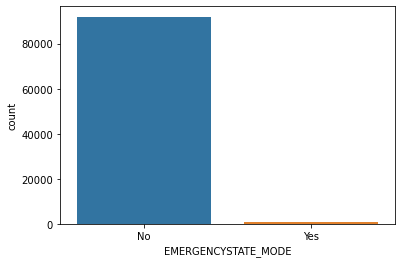

In [128]:
sns.countplot(df2_cat['EMERGENCYSTATE_MODE'])

In [129]:
df2_cat['EMERGENCYSTATE_MODE'].value_counts()

No     91946
Yes      700
Name: EMERGENCYSTATE_MODE, dtype: int64

In [130]:
## Hypothesis Testing

EMERGENCYSTATE_MODE_Effect=pd.crosstab(df2_cat['EMERGENCYSTATE_MODE'],df2_cat['TARGET'])

In [131]:
EMERGENCYSTATE_MODE_Effect

TARGET,NO,YES
EMERGENCYSTATE_MODE,,
No,85599,6347
Yes,645,55


In [132]:
chi2_contingency(EMERGENCYSTATE_MODE_Effect)

(0.8405290281176404,
 0.3592455123521737,
 1,
 array([[8.55923712e+04, 6.35362878e+03],
        [6.51628781e+02, 4.83712195e+01]]))

In [133]:
### pval is 0.36 i.e. it GREATER than 0.05 means H0 is ACCEPTED.

**Therefore they both have NO Relation. Therefore we can drop this column**

In [134]:
df2_cat=df2_cat.drop(['EMERGENCYSTATE_MODE'],axis=1)

In [135]:
df2_cat.shape

(92646, 15)

## 2.2 FONDKAPREMONT_MODE

In [136]:
df2_cat['FONDKAPREMONT_MODE'].value_counts()

reg oper account         66515
reg oper spec account    11039
not specified             5177
0                         4970
org spec account          4945
Name: FONDKAPREMONT_MODE, dtype: int64

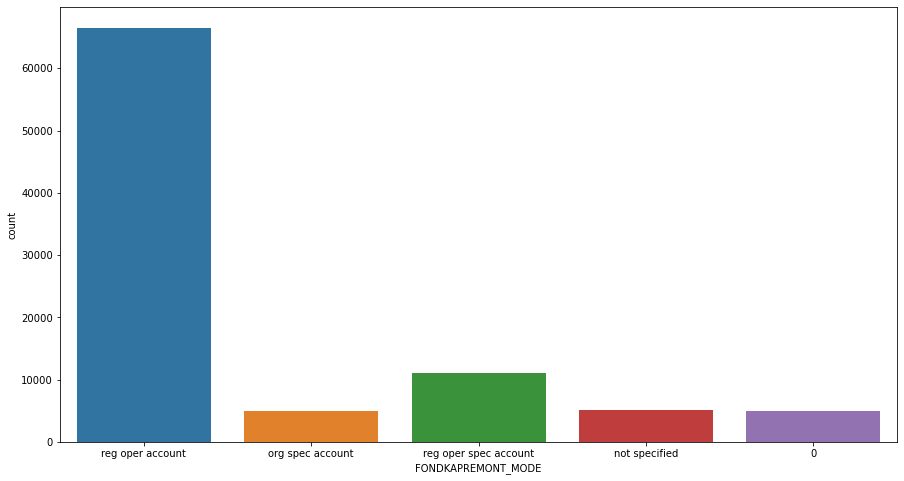

In [137]:
plt.figure(figsize=(15,8))
sns.countplot(df2_cat['FONDKAPREMONT_MODE'])
plt.show()

In [138]:
## Hypothesis Testing

FONDKAPREMONT_MODE_Effect=pd.crosstab(df2_cat['FONDKAPREMONT_MODE'],df2_cat['TARGET'])

In [139]:
FONDKAPREMONT_MODE_Effect

TARGET,NO,YES
FONDKAPREMONT_MODE,,
0,4618,352
not specified,4781,396
org spec account,4658,287
reg oper account,61880,4635
reg oper spec account,10307,732


In [140]:
chi2_contingency(FONDKAPREMONT_MODE_Effect)

(15.721306114253679,
 0.0034168623629440447,
 4,
 array([[ 4626.56434169,   343.43565831],
        [ 4819.26028107,   357.73971893],
        [ 4603.29188524,   341.70811476],
        [61918.69762321,  4596.30237679],
        [10276.18586879,   762.81413121]]))

In [141]:
### pval is  0.0034 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 2.3 HOUSETYPE_MODE

In [142]:
df2_cat['HOUSETYPE_MODE'].value_counts()

block of flats      91260
specific housing      637
terraced house        545
0                     204
Name: HOUSETYPE_MODE, dtype: int64

In [145]:
## reducing classes
def house(a):
    if ((a=='specific housing') | (a=='terraced house')):
        return ('House')
    elif a=='block of flats':
        return ('Flat')
    else:
        return a

In [144]:
df2_cat['HOUSETYPE_MODE']=df2_cat['HOUSETYPE_MODE'].apply(house)

In [145]:
df2_cat['HOUSETYPE_MODE'].value_counts()

Flat     91260
House     1182
0          204
Name: HOUSETYPE_MODE, dtype: int64

<AxesSubplot:xlabel='HOUSETYPE_MODE', ylabel='count'>

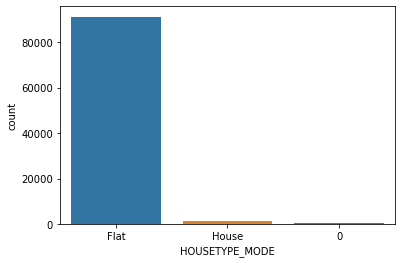

In [146]:
sns.countplot(df2_cat['HOUSETYPE_MODE'])

In [147]:
## Hypothesis Testing

HOUSETYPE_MODE_Effect=pd.crosstab(df2_cat['HOUSETYPE_MODE'],df2_cat['TARGET'])

In [148]:
HOUSETYPE_MODE_Effect

TARGET,NO,YES
HOUSETYPE_MODE,,
0,183,21
Flat,84994,6266
House,1067,115


In [149]:
chi2_contingency(HOUSETYPE_MODE_Effect)

(18.51027267040058,
 9.561925603779755e-05,
 2,
 array([[1.89903245e+02, 1.40967554e+01],
        [8.49537750e+04, 6.30622499e+03],
        [1.10032174e+03, 8.16782592e+01]]))

In [150]:
### pval is  9.561925603779755e-05 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 2.4 WALLSMATERIAL_MODE

In [151]:
df2_cat['WALLSMATERIAL_MODE'].value_counts()

Panel           43241
Stone, brick    37477
Block            6093
Wooden           2163
Monolithic       1141
Mixed            1070
Others            911
0                 550
Name: WALLSMATERIAL_MODE, dtype: int64

In [146]:
## reducing classes

def mat(a):
    if a=='Stone, brick':
        return ('Stone/Brick')
    elif a=='Panel':
        return ('Panel')
    else:
        return ('Others')

In [153]:
df2_cat['WALLSMATERIAL_MODE']=df2_cat['WALLSMATERIAL_MODE'].apply(mat)

In [154]:
df2_cat['WALLSMATERIAL_MODE'].value_counts()

Panel          43241
Stone/Brick    37477
Others         11928
Name: WALLSMATERIAL_MODE, dtype: int64

In [155]:
## Hypothesis Testing

WALLSMATERIAL_MODE_Effect=pd.crosstab(df2_cat['WALLSMATERIAL_MODE'],df2_cat['TARGET'])

In [156]:
chi2_contingency(WALLSMATERIAL_MODE_Effect)

(41.1475253931249,
 1.161257117599498e-09,
 2,
 array([[11103.75442005,   824.24557995],
        [40252.9715692 ,  2988.0284308 ],
        [34887.27401075,  2589.72598925]]))

In [157]:
### pval is   1.161257117599498e-09 i.e. it less than 0.05 means H0 is rejected.

**Therefore they both have Relation.**

## 2.5 WEEKDAY_APPR_PROCESS_START

In [158]:
df2_cat['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'TUESDAY',
       'SUNDAY'], dtype=object)

In [159]:
## Hypothesis Testing

WEEKDAY_APPR_PROCESS_START_Effect=pd.crosstab(df2_cat['WEEKDAY_APPR_PROCESS_START'],df2_cat['TARGET'])

In [160]:
chi2_contingency(WEEKDAY_APPR_PROCESS_START_Effect)

(11.270063132835144,
 0.08037991274661953,
 6,
 array([[13975.57554563,  1037.42445437],
        [14417.75221812,  1070.24778188],
        [ 9712.99242277,   721.00757723],
        [ 4607.94637653,   342.05362347],
        [14117.07208082,  1047.92791918],
        [15013.52710317,  1114.47289683],
        [14399.13425296,  1068.86574704]]))

In [161]:
### pval is  0.08 i.e. it GREATER than 0.05 means H0 is ACCEPTED.

**Therefore they both have NO Relation.**

In [162]:
## dropping the column as we have already dropped this column in dataset 1.

df2_cat=df2_cat.drop(['WEEKDAY_APPR_PROCESS_START'],axis=1)

In [163]:
df2_cat.shape

(92646, 14)

In [164]:
se=df2_cat.columns

In [165]:
set3=set(se)

In [166]:
set3-set1

{'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'}

<a id="num" > </a>
# [6.2 Handling Numerical Features](#home)

<a id='var'></a>
## 6.2.1 Dropping features with very less variance

In [216]:
application_data_cleaned_1 = pd.read_csv('D:\\CAPSTONE PROJECT DATASETS_BACKUP\\BACKUP of DATAFRAMES\\application_data_cleaned_1_backup1.csv')

In [220]:
application_data_cleaned_2 = pd.read_csv('D:\\CAPSTONE PROJECT DATASETS_BACKUP\\BACKUP of DATAFRAMES\\application_data_cleaned_2_backup1.csv')

In [225]:
application_data_cleaned_1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
application_data_cleaned_2.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [226]:
application_data_cleaned_1.shape, application_data_cleaned_2.shape

((212870, 129), (92646, 176))

In [217]:
# Taking dataset 1 first and dropping the Target feature from variance check

X1_vars = application_data_cleaned_1.drop('TARGET', axis=1).var().sort_values()

# checking feature below .01 variance
X1_vars[X1_vars<0.01]

FLAG_MOBIL                    0.000000
FLAG_DOCUMENT_12              0.000005
FLAG_DOCUMENT_10              0.000019
FLAG_DOCUMENT_2               0.000038
FLAG_DOCUMENT_4               0.000085
FLAG_DOCUMENT_7               0.000122
REGION_POPULATION_RELATIVE    0.000153
FLAG_DOCUMENT_17              0.000249
FLAG_DOCUMENT_21              0.000296
FLAG_DOCUMENT_20              0.000409
FLAG_DOCUMENT_19              0.000573
FLAG_DOCUMENT_15              0.000986
prev_Cars                     0.001563
FLAG_CONT_MOBILE              0.001684
FLAG_DOCUMENT_14              0.002175
FLAG_DOCUMENT_13              0.002979
FLAG_DOCUMENT_11              0.003175
FLAG_DOCUMENT_9               0.003329
AMT_REQ_CREDIT_BUREAU_HOUR    0.005862
FLAG_DOCUMENT_18              0.007298
FLAG_DOCUMENT_16              0.008458
AMT_REQ_CREDIT_BUREAU_DAY     0.009485
dtype: float64

In [221]:
# Repeating same step for dataset 2

X2_vars = application_data_cleaned_2.drop('TARGET', axis=1).var().sort_values()

# checking feature below .01 variance
X2_vars[X2_vars<0.01]

FLAG_MOBIL                      0.000000
FLAG_DOCUMENT_12                0.000011
FLAG_DOCUMENT_10                0.000032
FLAG_DOCUMENT_2                 0.000054
FLAG_DOCUMENT_4                 0.000076
FLAG_DOCUMENT_7                 0.000227
REGION_POPULATION_RELATIVE      0.000270
FLAG_DOCUMENT_17                0.000302
FLAG_DOCUMENT_21                0.000421
FLAG_DOCUMENT_19                0.000604
FLAG_DOCUMENT_20                0.000712
prev_Cars                       0.001144
YEARS_BEGINEXPLUATATION_AVG     0.001204
YEARS_BEGINEXPLUATATION_MEDI    0.001299
FLAG_DOCUMENT_15                0.001563
YEARS_BEGINEXPLUATATION_MODE    0.001786
NONLIVINGAPARTMENTS_MODE        0.002029
NONLIVINGAPARTMENTS_MEDI        0.002136
NONLIVINGAPARTMENTS_AVG         0.002168
FLAG_CONT_MOBILE                0.002251
NONLIVINGAREA_MODE              0.003640
NONLIVINGAREA_AVG               0.003670
NONLIVINGAREA_MEDI              0.003699
FLAG_DOCUMENT_14                0.004470
FLAG_DOCUMENT_13

## Assigning weights to all the FLAG_DOCUMENT

In [253]:
def flag_docs_cols(df):
    cols=[]
    for col in application_data_cleaned_1.columns:
        if 'FLAG_DOC' in col:
            cols.append(col)
            
    return cols

In [254]:
flag_cols = flag_docs_cols(application_data_cleaned_1)
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [272]:
# creating function to assign different weights to each flag columns

def flag_docs(df):
    for col in df.columns:
        if 'FLAG_DOC' in col:
            df[col] = df[col]*(df.shape[0]/df[col].sum())
    
    return df

In [242]:
test_df = flag_docs(application_data_cleaned_1)

In [257]:
test_df[flag_cols].head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.382749,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,12.991761,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.382749,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,12.991761,0.0,0.0,0.0,0.0,0.0,458.771552,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
test_df['FLAG_DOCUMENT_10'].value_counts()

0.0        212866
53217.5         4
Name: FLAG_DOCUMENT_10, dtype: int64

## Creating new FLAG_DOCUMENT_SUM which will replace all the 20 flag doc columns

In [261]:
test_df['FLAG_DOCUMENT_SUM'] = test_df[flag_cols].T.sum()
test_df['FLAG_DOCUMENT_SUM'].skew()

261.83424942098463

### we can drop the 20 flag columns now

In [263]:
features_to_drop = flag_cols

In [265]:
test_df.drop(features_to_drop, axis=1, inplace=True)

In [266]:
test_df.shape #new shape

(212870, 110)

In [270]:
test_df.isnull().sum().sort_values(ascending=False).head()

TARGET                  0
AVG_AMT_CREDIT          0
prev_status_Refused     0
prev_status_Canceled    0
prev_status_Approved    0
dtype: int64

## Applying same result on Dataset 2

In [273]:
test_df2 = flag_docs(application_data_cleaned_2)

In [274]:
test_df2[flag_cols].head()


,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.0,1.458831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.458831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.458831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.458831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.458831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
test_df2['FLAG_DOCUMENT_10'].value_counts()

0.0        92643
30882.0        3
Name: FLAG_DOCUMENT_10, dtype: int64

In [277]:
## Creating new FLAG_DOCUMENT_SUM which will replace all the 20 flag doc columns

In [278]:
test_df2['FLAG_DOCUMENT_SUM'] = test_df2[flag_cols].T.sum()
test_df2['FLAG_DOCUMENT_SUM'].skew()

143.48801126333086

In [279]:
### we can drop the 20 flag columns now

features_to_drop = flag_cols

In [280]:
test_df2.drop(features_to_drop, axis=1, inplace=True)

In [281]:
test_df2.shape #new shape

(92646, 157)

In [283]:
test_df2.isnull().sum().sort_values(ascending=False).head()  # just checking nulls for any error in processing

TARGET                            0
PERCENT_ON_TIME_PAYMENT_BUREAU    0
TOTAL_CUSTOMER_CREDIT             0
DEBT_PERCENT                      0
TOTAL_CUSTOMER_OVERDUE            0
dtype: int64

## Now Hanlding Low Variance

In [287]:
# Taking dataset 1 first and dropping the Target feature from variance check

X1_vars = test_df.drop('TARGET', axis=1).var().sort_values()

# checking feature below .01 variance
X1_vars[X1_vars<0.01]

FLAG_MOBIL                    0.000000
REGION_POPULATION_RELATIVE    0.000153
prev_Cars                     0.001563
FLAG_CONT_MOBILE              0.001684
AMT_REQ_CREDIT_BUREAU_HOUR    0.005862
AMT_REQ_CREDIT_BUREAU_DAY     0.009485
dtype: float64

In [288]:
# Repeating same step for dataset 2

X2_vars = test_df2.drop('TARGET', axis=1).var().sort_values()

# checking feature below .01 variance
X2_vars[X2_vars<0.01]

FLAG_MOBIL                      0.000000
REGION_POPULATION_RELATIVE      0.000270
prev_Cars                       0.001144
YEARS_BEGINEXPLUATATION_AVG     0.001204
YEARS_BEGINEXPLUATATION_MEDI    0.001299
YEARS_BEGINEXPLUATATION_MODE    0.001786
NONLIVINGAPARTMENTS_MODE        0.002029
NONLIVINGAPARTMENTS_MEDI        0.002136
NONLIVINGAPARTMENTS_AVG         0.002168
FLAG_CONT_MOBILE                0.002251
NONLIVINGAREA_MODE              0.003640
NONLIVINGAREA_AVG               0.003670
NONLIVINGAREA_MEDI              0.003699
COMMONAREA_MODE                 0.005542
COMMONAREA_AVG                  0.005781
COMMONAREA_MEDI                 0.005798
LANDAREA_AVG                    0.005862
LANDAREA_MODE                   0.005904
LANDAREA_MEDI                   0.005973
BASEMENTAREA_MEDI               0.006546
AMT_REQ_CREDIT_BUREAU_HOUR      0.006614
BASEMENTAREA_AVG                0.006614
BASEMENTAREA_MODE               0.006860
LIVINGAPARTMENTS_AVG            0.008595
LIVINGAPARTMENTS

**We can see a definite impact on the number of columns having variance less than 0.01.** ALl the FLAG_DOCUMENT features are removed from this processing.

In [289]:
# let's drop these features below 0.01 variance value

features_to_drop1 = X1_vars[X1_vars<0.01].index
features_to_drop2 = X2_vars[X2_vars<0.01].index

In [290]:
# shape before dropping

print(application_data_cleaned_1.shape)
print(application_data_cleaned_2.shape)

(212870, 110)
(92646, 157)


In [291]:
application_data_cleaned_1_trimmed =  application_data_cleaned_1.drop(features_to_drop1, axis=1)

In [292]:
application_data_cleaned_2_trimmed =  application_data_cleaned_2.drop(features_to_drop2, axis=1)

In [293]:
# shape after dropping

print(application_data_cleaned_1_trimmed.shape)
print(application_data_cleaned_2_trimmed.shape)

(212870, 104)
(92646, 129)


**Observation:** We have managed to drop **6 features from dataset1** and **28 features from dataset2** having variance value less than 0.01

<a id='outliers'></a>
## [6.2.2. Checking Outliers and dropping few extreme outliers](#home)

In [59]:
#checking skewed features from dataset 2

def extreme_skewed_data(df, thresh):
    skewed_features = df.skew().sort_values(ascending=False)
    # saving highly skewed features > thresh
    highly_skewed = skewed_features[abs(skewed_features)>thresh]
    return highly_skewed

In [297]:
#checking skewed features from dataset 1

highly_skewed1 = extreme_skewed_data(application_data_cleaned_1_trimmed)
highly_skewed1.head()

AMT_INCOME_TOTAL             361.346508
OVERDUE_DEBT_PERCENT         360.461065
FLAG_DOCUMENT_SUM            261.834249
TOTAL_CUSTOMER_OVERDUE       161.248342
AMT_REQ_CREDIT_BUREAU_QRT    160.467901
dtype: float64

### Analysing top 4 Highly skewed features

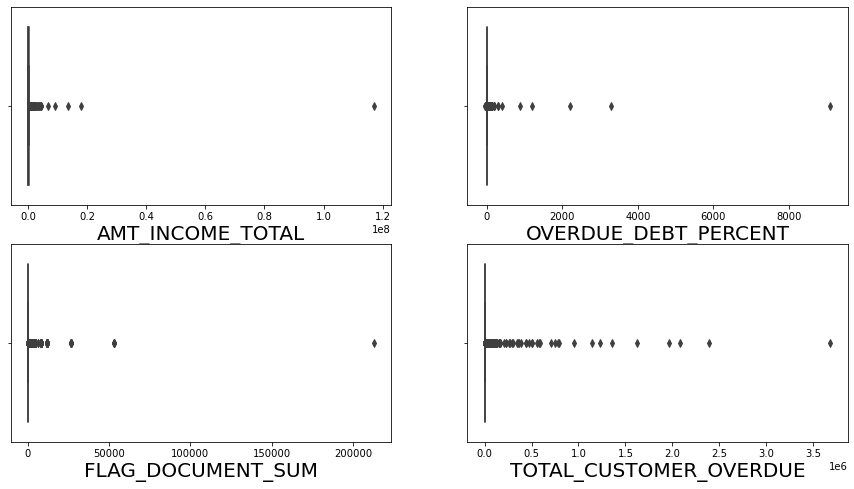

In [298]:
df_extremes = application_data_cleaned_1_trimmed[highly_skewed1.head(4).index]

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for variable, subplot in zip(df_extremes.columns, ax.flatten()):
    z = sns.boxplot(x = df_extremes[variable], orient = "h",whis=3.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label
    
    
plt.show()  


**Observations:** 
- We can see the extreme outliers present in the above features.
- Best approach we can think of is to drop these extreme outliers to bring our skewness to less outrageous levels.

*Let's analyse the impact of dropping the extreme outliers of features one by one*

In [299]:
# running loop to check impact of dropping 25 highest value instances each from extreme columns

for col in df_extremes.columns:
    temp = df_extremes.drop(index=df_extremes[col].sort_values(ascending=False).head(5).index)#dropping 5 most extreme instances
    print("Skewness of", col, "after dropping 25 highest instances is: ", temp[col].skew())


Skewness of AMT_INCOME_TOTAL after dropping 25 highest instances is:  5.9680824206031975
Skewness of OVERDUE_DEBT_PERCENT after dropping 25 highest instances is:  78.65719362043744
Skewness of FLAG_DOCUMENT_SUM after dropping 25 highest instances is:  62.53439994955821
Skewness of TOTAL_CUSTOMER_OVERDUE after dropping 25 highest instances is:  115.03068499157186


**We can see definite positive impact of dropping 5 extreme rows from AMT_INCOME_TOTAL and FLAG_DOCUMENT_SUM features.**

Let's apply this to our main dataset.

In [300]:
application_data_cleaned_1_trimmed = application_data_cleaned_1_trimmed.drop(index=application_data_cleaned_1_trimmed['AMT_INCOME_TOTAL'].sort_values(ascending=False).head(5).index)
application_data_cleaned_1_trimmed = application_data_cleaned_1_trimmed.drop(index=application_data_cleaned_1_trimmed['FLAG_DOCUMENT_SUM'].sort_values(ascending=False).head(5).index)



In [301]:
application_data_cleaned_1_trimmed = application_data_cleaned_1_trimmed.drop(index=application_data_cleaned_1_trimmed['OVERDUE_DEBT_PERCENT'].sort_values(ascending=False).head(5).index)


### Let's check the shape and skewness again for these columns

In [302]:
#checking skewed features from dataset 1

highly_skewed1 = extreme_skewed_data(application_data_cleaned_1_trimmed)
highly_skewed1.head()

TOTAL_CUSTOMER_OVERDUE       171.022065
AMT_REQ_CREDIT_BUREAU_QRT    160.471793
OVERDUE_DEBT_PERCENT          78.655346
FLAG_DOCUMENT_SUM             62.533619
TOTAL_CUSTOMER_CREDIT         38.412291
dtype: float64

### Lets further drop 5 features each from TOTAL_CUSTOMER_OVERDUE & AMT_REQ_CREDIT_BUREAU_QRT

In [303]:
application_data_cleaned_1_trimmed = application_data_cleaned_1_trimmed.drop(index=application_data_cleaned_1_trimmed['TOTAL_CUSTOMER_OVERDUE'].sort_values(ascending=False).head(5).index)
application_data_cleaned_1_trimmed = application_data_cleaned_1_trimmed.drop(index=application_data_cleaned_1_trimmed['AMT_REQ_CREDIT_BUREAU_QRT'].sort_values(ascending=False).head(5).index)

In [304]:
#checking skewed features from dataset 1

highly_skewed1 = extreme_skewed_data(application_data_cleaned_1_trimmed)
highly_skewed1.head()

TOTAL_CUSTOMER_OVERDUE      114.700065
OVERDUE_DEBT_PERCENT         80.758948
FLAG_DOCUMENT_SUM            62.532201
TOTAL_CUSTOMER_CREDIT        38.419733
OBS_30_CNT_SOCIAL_CIRCLE     15.481834
dtype: float64

In [305]:
application_data_cleaned_1_trimmed.shape, application_data_cleaned_1.shape

((212845, 104), (212870, 110))

**We have eliminated 6 low variance features earlier and now trimmed 25 extreme outlier instances to reduce skewness of columns**

## Applying same approach for dataset2

In [306]:
application_data_cleaned_2_trimmed.shape, application_data_cleaned_2.shape

((92646, 129), (92646, 157))

In [307]:
#checking skewed features from dataset 2

highly_skewed2 = extreme_skewed_data(application_data_cleaned_2_trimmed)
highly_skewed2.head()

OVERDUE_DEBT_PERCENT         168.810994
TOTAL_CUSTOMER_OVERDUE       160.282164
FLAG_DOCUMENT_SUM            143.488011
TOTAL_CUSTOMER_CREDIT        100.199206
AMT_REQ_CREDIT_BUREAU_DAY     29.645542
dtype: float64

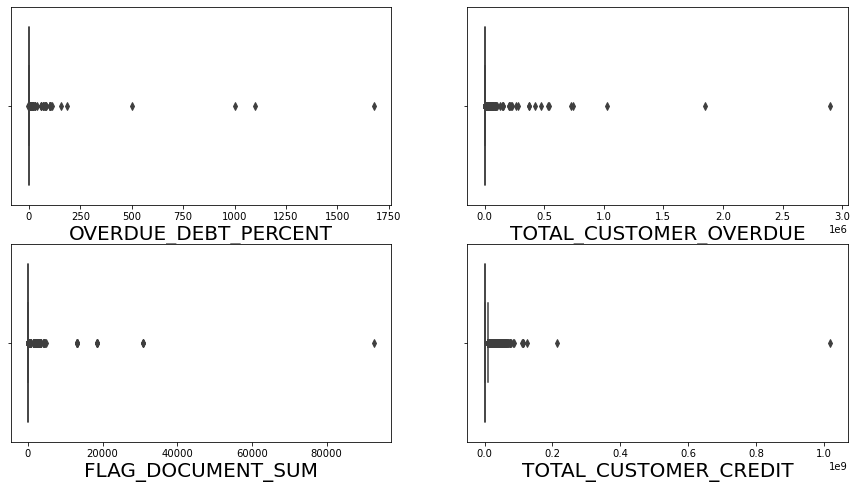

In [308]:
df_extremes2 = application_data_cleaned_2_trimmed[highly_skewed2.head(4).index]

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for variable, subplot in zip(df_extremes2.columns, ax.flatten()):
    z = sns.boxplot(x = df_extremes2[variable], orient = "h",whis=3.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label
    
    
plt.show()  

In [309]:
# running loop to check impact of dropping 5 highest value instances each from extreme columns

for col in df_extremes2.columns:
    temp = df_extremes2.drop(index=df_extremes2[col].sort_values(ascending=False).head(5).index)
    print("Skewness of", col, "after dropping 25 highest instances is: ", temp[col].skew())


Skewness of OVERDUE_DEBT_PERCENT after dropping 25 highest instances is:  63.21332431680201
Skewness of TOTAL_CUSTOMER_OVERDUE after dropping 25 highest instances is:  81.31425445705149
Skewness of FLAG_DOCUMENT_SUM after dropping 25 highest instances is:  54.648400794194025
Skewness of TOTAL_CUSTOMER_CREDIT after dropping 25 highest instances is:  6.422911601529891


In [310]:
## There is a significant impact of trimming extreme instances on the skewness.

### starting to drop 5 rows each

In [311]:
# dropping 5 rows each from OVERDUE_DEBT_PERCENT

application_data_cleaned_2_trimmed_test = application_data_cleaned_2_trimmed.drop(index=application_data_cleaned_2_trimmed['OVERDUE_DEBT_PERCENT'].sort_values(ascending=False).head(5).index)

In [312]:
extreme_skewed_data(application_data_cleaned_2_trimmed_test).head()

TOTAL_CUSTOMER_OVERDUE       160.277844
FLAG_DOCUMENT_SUM            143.484156
TOTAL_CUSTOMER_CREDIT        100.196928
OVERDUE_DEBT_PERCENT          63.213324
AMT_REQ_CREDIT_BUREAU_DAY     29.674330
dtype: float64

In [313]:
# dropping 5 rows again now from TOTAL_CUSTOMER_OVERDUE and TOTAL_CUSTOMER_CREDIT

application_data_cleaned_2_trimmed_test = application_data_cleaned_2_trimmed_test.drop(index=application_data_cleaned_2_trimmed_test['TOTAL_CUSTOMER_CREDIT'].sort_values(ascending=False).head(5).index)
application_data_cleaned_2_trimmed_test = application_data_cleaned_2_trimmed_test.drop(index=application_data_cleaned_2_trimmed_test['TOTAL_CUSTOMER_OVERDUE'].sort_values(ascending=False).head(5).index)

In [314]:
extreme_skewed_data(application_data_cleaned_2_trimmed_test).head()

FLAG_DOCUMENT_SUM             143.477087
TOTAL_CUSTOMER_OVERDUE         81.309890
OVERDUE_DEBT_PERCENT           62.784968
AMT_REQ_CREDIT_BUREAU_DAY      29.672726
AMT_REQ_CREDIT_BUREAU_WEEK      9.433972
dtype: float64

In [315]:
# finally chopping 5 features again from FLAG_DOCUMENT_SUM
 
application_data_cleaned_2_trimmed_test = application_data_cleaned_2_trimmed_test.drop(index=application_data_cleaned_2_trimmed_test['FLAG_DOCUMENT_SUM'].sort_values(ascending=False).head(5).index)


In [316]:
extreme_skewed_data(application_data_cleaned_2_trimmed_test).head()

TOTAL_CUSTOMER_OVERDUE        81.307696
OVERDUE_DEBT_PERCENT          62.783272
FLAG_DOCUMENT_SUM             54.645016
AMT_REQ_CREDIT_BUREAU_DAY     29.671925
AMT_REQ_CREDIT_BUREAU_WEEK     9.433712
dtype: float64

From maximum skewness of 168 we have braught down it to 81. 

In [317]:
# Let's check shape after our treatement of extreme values and variance

application_data_cleaned_2_trimmed_test.shape, application_data_cleaned_2.shape

((92626, 129), (92646, 157))

28 features were dropped earlier and now we have trimmed 20 extreme outliers as well.

### saving this progress in our new CSV files

In [318]:
application_data_cleaned_1_trimmed.to_csv('application_data_cleaned_1.csv')

In [319]:
application_data_cleaned_2_trimmed_test.to_csv('application_data_cleaned_2.csv')

<a id='feateng'></a>
# [6.3 Creating New Features and Modifying Existing ones](#home)

In [320]:
df1 = pd.read_csv('application_data_cleaned_1.csv')
df2 = pd.read_csv('application_data_cleaned_2.csv')

In [48]:
df1.shape, df2.shape

NameError: name 'df2' is not defined

In [322]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df2 = df2.drop('Unnamed: 0', axis = 1)

<a id='days'></a>
## 6.3.1 Identifying anomalies in DAYS Features

In [323]:
# Days featire have all values in negative but there are some values which are more than 0 and are constant. 

# lets see them

df1[df1['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].head()

6     365243
9     365243
27    365243
32    365243
40    365243
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
## To tackle this creating a formula to replace all such anomalies with 0. Since, it will be logical option.

In [324]:
def replace_anomalies(df):
    for col in df.columns:
        if 'DAYS' in col:
            df[col].replace(365243, 0, inplace=True)
    
    return df        

In [325]:
df1 = replace_anomalies(df1)
df2 = replace_anomalies(df2)

In [326]:
# now let's convert these days to Years and drop the DAYS features

def days_to_years(df):
    for col in df.columns:
        if 'DAYS' in col:
            df['YEARS'+col[4:]] = df[col]/(-365)
            df = df.drop(col,axis=1)
    
    return df        

In [327]:
df1 = days_to_years(df1)
df2 = days_to_years(df2)

In [328]:
df1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,OCCUPATION_TYPE_ENCODED,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev
0,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0000,0.0000,189037.8,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5357.25,0.00,24282.00,0.00,20106.00,0.00,24282.00,0.00,4.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,75.000000,25.000000,100.0000,3.0,1.0,100.0000,0,0.000000,52.180822,0.616438,11.671233,6.934247,2.232877,-1.257534,2.232877
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.509149,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23651.18,13623.58,272203.26,286175.13,291695.50,333337.35,408304.89,253670.60,23.00,20.23,5.0,2.0,2.0,5.0,3.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,8.0,1.0,3.0,2.0,2.0,2.0,1.0,6.0,100.0,270000.0,100.0,0.0,21.0,3.0,85.714286,9.523810,100.0000,16.0,3.0,100.0000,0,1.382749,52.068493,8.326027,26.939726,6.676712,1.690411,-0.000000,0.746423
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.417930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0000,0.0000,146250.0,0.000000,0.0,0.0,0.0,0.0,0.0,6.0,60.0,12278.80,8063.59,150530.25,100585.99,166638.75,118032.41,150530.25,100585.99,20.67,14.35,4.0,2.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,5.0,0.0,4.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,66.0,5.0,93.939394,4.545455,100.0000,66.0,5.0,75.7576,2,12.991761,54.608219,8.323288,11.810959,9.473973,3.030137,-0.000000,3.350228
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Sec

In [331]:
df1.shape, df2.shape

((212845, 104), (92626, 129))

In [330]:
df1.isnull().sum().sort_values(ascending=False).head()

TARGET                   0
NAME_CONTRACT_TYPE       0
prev_Cards               0
CLIENT_TYPE_Repeater     0
CLIENT_TYPE_Refreshed    0
dtype: int64

<a id = 'catsim'></a>
## 6.3.2 Simplifying Categorical Features

We have already worked a lot on categorical features above including testing statistical significance of all the categorical featues and we will just apply our work here.

In [332]:
# DATSET 1
# simplifying classes here

df1['NAME_TYPE_SUITE']=df1['NAME_TYPE_SUITE'].apply(suit)
df1['NAME_INCOME_TYPE']=df1['NAME_INCOME_TYPE'].apply(income)
df1['NAME_EDUCATION_TYPE']=df1['NAME_EDUCATION_TYPE'].apply(edu)
df1['NAME_FAMILY_STATUS']=df1['NAME_FAMILY_STATUS'].apply(marr)
df1['NAME_HOUSING_TYPE']=df1['NAME_HOUSING_TYPE'].apply(houses)
df1['ORGANIZATION_TYPE']=df1['ORGANIZATION_TYPE'].apply(organization)


# dropping statistically insignificant feature
df1=df1.drop(['WEEKDAY_APPR_PROCESS_START'],axis=1)

In [333]:
# DATSET 2
# simplifying classes here

df2['NAME_TYPE_SUITE']=df2['NAME_TYPE_SUITE'].apply(suit)
df2['NAME_INCOME_TYPE']=df2['NAME_INCOME_TYPE'].apply(income)
df2['NAME_EDUCATION_TYPE']=df2['NAME_EDUCATION_TYPE'].apply(edu)
df2['NAME_FAMILY_STATUS']=df2['NAME_FAMILY_STATUS'].apply(marr)
df2['NAME_HOUSING_TYPE']=df2['NAME_HOUSING_TYPE'].apply(houses)
df2['ORGANIZATION_TYPE']=df2['ORGANIZATION_TYPE'].apply(organization)
df2['WALLSMATERIAL_MODE']=df2['WALLSMATERIAL_MODE'].apply(mat)
df2['HOUSETYPE_MODE']=df2['HOUSETYPE_MODE'].apply(house)


# dropping statistically insignificant features

df2=df2.drop(['WEEKDAY_APPR_PROCESS_START'],axis=1)
df2=df2.drop(['EMERGENCYSTATE_MODE'],axis=1)

In [334]:
df1['OCCUPATION_TYPE_ENCODED'].value_counts()

0    111695
1     56413
2     44737
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

In [335]:
# changing OCCUPATION_TYPE_ENCODED to object type

df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE_ENCODED'].map({0: 'LOWER_SKILL',1: 'MEDIUM_SKILL',2: 'HIGHER_SKILL'})

In [336]:
# changing OCCUPATION_TYPE_ENCODED to object type

df2['OCCUPATION_TYPE'] = df2['OCCUPATION_TYPE_ENCODED_Imputed'].map({0: 'LOWER_SKILL',1: 'MEDIUM_SKILL',2: 'HIGHER_SKILL'})

In [337]:
df1['OCCUPATION_TYPE'].value_counts()

LOWER_SKILL     111695
MEDIUM_SKILL     56413
HIGHER_SKILL     44737
Name: OCCUPATION_TYPE, dtype: int64

In [338]:
df1 = df1.drop('OCCUPATION_TYPE_ENCODED', axis=1)

In [339]:
df2 = df2.drop('OCCUPATION_TYPE_ENCODED_Imputed', axis=1)

In [340]:
## Checking the categorical Features Summary now

df1.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE
count,212845,212845,212845,212845,212845,212845,212845,212845,212845,212845,212845
unique,2,3,2,2,3,4,3,3,2,5,3
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary_Education,Married,Own House,OTHERS,LOWER_SKILL
freq,194105,139074,139419,146826,170964,112283,162549,159476,188719,106939,111695


In [341]:
## Checking the categorical Features Summary now

df2.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OCCUPATION_TYPE
count,92626,92626,92626,92626,92626,92626,92626,92626,92626,92626,92626,92626,92626,92626
unique,2,3,2,2,3,4,3,3,2,5,5,3,3,3
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary_Education,Married,Own House,OTHERS,reg oper account,Flat,Panel,LOWER_SKILL
freq,82983,62030,62135,65304,76604,45520,64744,65285,82356,45200,66504,91240,43230,45125


<a id = 'flag'></a>
## 6.3.3 Creating Flag Variables for Bureau, Credit Card, and previous loan accounts

In [342]:
df1['FLAG_BUREAU_ACCOUNT'] = df1['TOTAL_BUREAU_ACCOUNTS'].apply(lambda x: 'YES' if x>0 else 'NO')

In [343]:
df1['FLAG_BUREAU_ACCOUNT'].value_counts()

YES    181509
NO      31336
Name: FLAG_BUREAU_ACCOUNT, dtype: int64

In [344]:
# let's apply to all total accounts

df1['FLAG_CREDIT_CARD'] = df1['TOTAL_COUNT_CC'].apply(lambda x: 'YES' if x>0 else 'NO')
df1['FLAG_PREV_APP'] = df1['TOTAL_PREV_APP'].apply(lambda x: 'YES' if x>0 else 'NO')
df1['FLAG_LOAN_ACCOUNTS_IP'] =  df1['TOTAL_LOAN_ACCOUNTS_IP'].apply(lambda x: 'YES' if x>0 else 'NO')
df1['FLAG_LOAN_ACCOUNTS_POS'] = df1['TOTAL_LOAN_ACCOUNTS_POS'].apply(lambda x: 'YES' if x>0 else 'NO')

In [345]:
df1.shape

(212845, 108)

In [346]:
df1['TOTAL_BUREAU_ACCOUNTS'].skew(), df1['TOTAL_COUNT_CC'].skew(), df1['TOTAL_PREV_APP'].skew(), df1['TOTAL_LOAN_ACCOUNTS_POS'].skew(), df1['TOTAL_LOAN_ACCOUNTS_IP'].skew()

(1.7801444017426595,
 2.6747126038113747,
 2.200499793878743,
 1.6466258296549934,
 1.5389209769773566)

In [185]:
# since, the count features are highly skewed, so it will be good to just drop them and keep the newly FLAG variables

df1 = df1.drop(['TOTAL_BUREAU_ACCOUNTS', 'TOTAL_COUNT_CC', 'TOTAL_PREV_APP', 'TOTAL_LOAN_ACCOUNTS_POS', 'TOTAL_LOAN_ACCOUNTS_IP'], axis=1)

In [192]:
from scipy import stats


# compute test statistic and corresponding p-value for two-tailed test
test_stat, p_value = stats.mannwhitneyu(df1[df1['TARGET']==0]['TOTAL_BUREAU_ACCOUNTS'], df1[df1['TARGET']==1]['TOTAL_BUREAU_ACCOUNTS'], alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 1865072117.5
p-value: 4.113121537942381e-31


Since, Pvalue is way less than 0.05, we will keep the TOTAL count variables for now and will handle later by other feature elimination method.

In [186]:
df2['TOTAL_BUREAU_ACCOUNTS'].skew(), df2['TOTAL_COUNT_CC'].skew(), df2['TOTAL_PREV_APP'].skew(), df2['TOTAL_LOAN_ACCOUNTS_POS'].skew(), df2['TOTAL_LOAN_ACCOUNTS_IP'].skew()

(1.5562714340377668,
 2.4685011411790843,
 2.297695949438128,
 1.6462021240444042,
 1.5368947141379676)

In [347]:
# let's apply to all total accounts of Dataset2

df2['FLAG_BUREAU_ACCOUNT'] = df2['TOTAL_BUREAU_ACCOUNTS'].apply(lambda x: 'YES' if x>0 else 'NO')
df2['FLAG_CREDIT_CARD'] = df2['TOTAL_COUNT_CC'].apply(lambda x: 'YES' if x>0 else 'NO')
df2['FLAG_PREV_APP'] = df2['TOTAL_PREV_APP'].apply(lambda x: 'YES' if x>0 else 'NO')
df2['FLAG_LOAN_ACCOUNTS_IP'] =  df2['TOTAL_LOAN_ACCOUNTS_IP'].apply(lambda x: 'YES' if x>0 else 'NO')
df2['FLAG_LOAN_ACCOUNTS_POS'] = df2['TOTAL_LOAN_ACCOUNTS_POS'].apply(lambda x: 'YES' if x>0 else 'NO')

In [348]:
df2.shape

(92626, 132)

In [352]:
# saving the progress to a new csv file

df1.to_csv('application_data_cleaned_1.csv')
df2.to_csv('application_data_cleaned_2.csv')

**Catrgorical Features are ready for Dummy creation**

In [350]:
application_data_cleaned_1.shape, application_data_cleaned_1_trimmed.shape, df1.shape

((212870, 110), (212845, 104), (212845, 108))

In [351]:
application_data_cleaned_2.shape, application_data_cleaned_2_trimmed.shape, df2.shape

((92646, 157), (92646, 129), (92626, 132))

<a id = 'domain'></a>
## [6.3.4 Creating New Domain Features (Ratios)](#home)

In [4]:
df1 = pd.read_csv('cleaned_dataset_1.csv')
df2 = pd.read_csv('cleaned_dataset_2.csv')

In [5]:
df1 = df1.drop(['Unnamed: 0','index'],axis=1)
df2 = df2.drop(['Unnamed: 0','index'],axis=1)


In [6]:
def new_features(df):
    df['EMPLOYMENT_AGE_RATIO'] = df['YEARS_EMPLOYED'] /df['YEARS_BIRTH']
    df['CREDIT_INCOME_RATIO'] =  df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'] 
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] /df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_CREDIT'] /df['AMT_ANNUITY']
    df['GOODS_INCOME_RATIO'] = df['AMT_GOODS_PRICE']/df['AMT_INCOME_TOTAL']
    df['GOODS_CREDIT_RATIO'] = df['AMT_GOODS_PRICE']/df['AMT_CREDIT']
    
    return df

In [7]:
df1 = new_features(df1)
df2 = new_features(df2)

In [8]:
df1.shape, df2.shape

((212051, 115), (92162, 139))

In [9]:
df1.isnull().sum().sort_values()

TARGET                  0
prev_POS                0
prev_Cash               0
prev_Cards              0
CLIENT_TYPE_Repeater    0
                       ..
CNT_FAM_MEMBERS         0
AMT_GOODS_PRICE         0
AMT_ANNUITY             0
AMT_INCOME_TOTAL        0
GOODS_CREDIT_RATIO      0
Length: 115, dtype: int64

In [10]:
df1.head()

,TARGET,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,FLAG_BUREAU_ACCOUNT,FLAG_CREDIT_CARD,FLAG_PREV_APP,FLAG_LOAN_ACCOUNTS_IP,FLAG_LOAN_ACCOUNTS_POS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev,EMPLOYMENT_AGE_RATIO,CREDIT_INCOME_RATIO,INCOME_PER_PERSON,ANNUITY_INCOME_RATIO,PAYMENT_RATE,GOODS_INCOME_RATIO,GOODS_CREDIT_RATIO
0,0,1,1,1,0,0,0,0,0,0,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary_Education,Unmarried,Own House,OTHERS,LOWER_SKILL,YES,NO,YES,YES,YES,0.0,16.118549,367.423461,82.158384,367.423461,1.000000,2,2,9,0.555912,0.729567,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.414214,100.0000,0.0000,20.851493,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,73.193237,0.000000,155.826827,0.000000,141.795628,0.000000,155.826827,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,1.000000,2.942831,5.000000,3.162278,1.732051,1.000000,3.162278,0.000000,52.180822,0.785136,11.671233,6.934247,2.232877,1.121398,2.232877,0.015046,22.795071,16.118549,5.097133,4.472136,22.795071,1.000000
1,0,1,0,0,0,0,0,0,0,0,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary_Education,Married,Own House,Business,LOWER_SKILL,NO,YES,YES,YES,YES,0.0,19.168293,559.180204,172.297707,544.977064,1.414214,2,2,17,0.650442,0.509149,1.414214,0.0,1.414214,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,153.789401,116.720093,521.731023,534.953390,540.088419,577.353748,638.987394,503.657225,4.795832,4.497777,2.236068,1.414214,1.189207,2.236068,1.316074,1.0,0.0,1.000000,0.0,1.732051,1.0,0.0,2.828427,1.0,1.732051,1.414214,1.414214,1.414214,1.000000,1.565085,10.0,22.795071,10.0,0.0,4.582576,1.732051,3.042729,3.086067,3.162278,4.000000,1.732051,3.162278,1.084391,52.068493,2.885486,26.939726,6.676712,1.690411,0.000000,0.746423,0.055417,29.172144,13.554030,8.988683,3.245430,28.431173,0.974600
2,0,1,0,0,0,0,0,0,0,1,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary_Education,Unmarried,Own House,OTHERS,HIGHER_SK

In [12]:
df1.index

RangeIndex(start=0, stop=212051, step=1)

In [13]:
# saving the progress to a new csv file

df1.to_csv('cleaned_dataset_1_latest.csv')
df2.to_csv('cleaned_dataset_2_latest.csv')

#26aug

<a id='transform'></a>
# [6.4 Final Data Preparation: Handling Skewness, Applying Transformation, Scaling Features, Creating Dummies](#home)


In [3]:
df1 = pd.read_csv('D:\\CAPSTONE PROJECT DATASETS_BACKUP\\BACKUP of DATAFRAMES\\application_data_cleaned_1_14Aug.csv')
df2 = pd.read_csv('D:\\CAPSTONE PROJECT DATASETS_BACKUP\\BACKUP of DATAFRAMES\\application_data_cleaned_2_14Aug.csv')

In [51]:
df1.shape, df2.shape

((212845, 109), (92626, 133))

In [358]:
df1.shape, df2.shape

((212845, 109), (92626, 133))

In [52]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df2 = df2.drop('Unnamed: 0', axis = 1)

In [53]:
df1['YEARSDAYS_DIFF'] = df1['YEARSDAYS_DIFF']*(-1)
df2['YEARSDAYS_DIFF'] = df2['YEARSDAYS_DIFF']*(-1)

In [54]:
df1.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev,OCCUPATION_TYPE,FLAG_BUREAU_ACCOUNT,FLAG_CREDIT_CARD,FLAG_PREV_APP,FLAG_LOAN_ACCOUNTS_IP,FLAG_LOAN_ACCOUNTS_POS
0,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary_Education,Unmarried,Own House,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,OTHERS,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,189037.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5357.25,0.00,24282.00,0.00,20106.0,0.00,24282.00,0.0,4.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,75.000000,25.00000,100.0,3.0,1.0,100.0,0.000000,52.180822,0.616438,11.671233,6.934247,2.232877,1.257534,2.232877,LOWER_SKILL,YES,NO,YES,YES,YES
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary_Education,Married,Own House,1,0,0,0,2.0,2,2,17,0,0,0,0,0,0,Business,0.650442,0.509149,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23651.18,13623.58,272203.26,286175.13,291695.5,333337.35,408304.89,253670.6,23.0,20.23,5.0,2.0,2.0,5.0,3.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,8.0,1.0,3.0,2.0,2.0,2.0,1.0,6.0,100.0,270000.0,100.0,0.0,21.0,3.0,85.714286,9.52381,100.0,16.0,3.0,100.0,1.382749,52.068493,8.326027,26.939726,6.676712,1.690411,0.000000,0.746423,LOWER_SKILL,NO,YES,YES,YES,YES


In [55]:
df2.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev,OCCUPATION_TYPE,FLAG_BUREAU_ACCOUNT,FLAG_CREDIT_CARD,FLAG_PREV_APP,FLAG_LOAN_ACCOUNTS_IP,FLAG_LOAN_ACCOUNTS_POS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary_Education,Unmarried,Own House,1,0,1,0,1.0,2,2,10,0,0,0,0,0,0,Business,0.262949,0.139376,0.0247,0.6192,0.00,0.0833,0.1250,0.0190,0.0252,0.6341,0.0000,0.0690,0.0833,0.1250,0.0198,0.0250,0.6243,0.00,0.0833,0.1250,0.0193,reg oper account,Flat,0.0149,Stone/Brick,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,8.0,50.0,25.0,865055.565,28.412163,0.0,0.0,29.25,13.457012,65.81935,1.0,0.00,9251.78,0.00,179055.0,0.00,179055.0,0.00,179055.0,0.00,24.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,100.000000,0.000000,100.0,19.0,1.0,100.0,1.458831,25.920548,1.745205,9.994521,5.808219,3.106849,0.456849,1.660274,LOWER_SKILL,YES,NO,YES,YES,YES
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher_Education,Married,Own House,1,0,1,0,2.0,1,1,11,0,0,0,0,0,0,EDUCATION,0.622246,0.474258,0.0959,0.7960,0.08,0.2917,0.3333,0.0549,0.0924,0.8040,0.0806,0.0345,0.2917,0.3333,0.0554,0.0968,0.7987,0.08,0.2917,0.3333,0.0558,reg oper account,Flat,0.0714,Others,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,50.0,25.0,1017400.500,0.000000,0.0,0.0,0.00,0.000000,0.00000,3.0,66.67,56553.99,46332.56,435436.5,424161.62,484191.0,497949.86,435436.5,424161.62,10.0,3.46,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,28.0,3.0,92.857143,7.142857,100.0,25.0,3.0,100.0,1.458831,45.931507,3.254795,3.249315,0.797260,2.268493,1.356164,3.575342

<a id='bin'></a>
## 6.4.1 Segregating Binary Numeric Features

### Dataset 1

In [56]:
df_num1 = df1.select_dtypes('number')

In [57]:
num_cols =df_num1.nunique()
binary_cols = num_cols[num_cols<3]

In [58]:
df_num1 = df_num1.drop(binary_cols.index, axis=1)
df_num1.head(2)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev
0,0,67500.0,135000.0,6750.0,135000.0,1.0,2,2,9,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,189037.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5357.25,0.00,24282.00,0.00,20106.0,0.00,24282.00,0.0,4.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,75.000000,25.00000,100.0,3.0,1.0,100.0,0.000000,52.180822,0.616438,11.671233,6.934247,2.232877,1.257534,2.232877
1,0,135000.0,312682.5,29686.5,297000.0,2.0,2,2,17,0.650442,0.509149,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23651.18,13623.58,272203.26,286175.13,291695.5,333337.35,408304.89,253670.6,23.0,20.23,5.0,2.0,2.0,5.0,3.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,8.0,1.0,3.0,2.0,2.0,2.0,1.0,6.0,100.0,270000.0,100.0,0.0,21.0,3.0,85.714286,9.52381,100.0,16.0,3.0,100.0,1.382749,52.068493,8.326027,26.939726,6.676712,1.690411,0.000000,0.746423


<a id='skew'></a>
## 6.4.2 Hanlding Skewness and Applying Various Transformations (Square Root, Log)

### Checking columns with skewness more than 2 

In [60]:
print(extreme_skewed_data(df_num1, thresh=2).head())
print(extreme_skewed_data(df_num1, thresh=2).shape)

TOTAL_CUSTOMER_OVERDUE      114.700065
OVERDUE_DEBT_PERCENT         80.758948
FLAG_DOCUMENT_SUM            62.532201
TOTAL_CUSTOMER_CREDIT        38.419733
OBS_30_CNT_SOCIAL_CIRCLE     15.481834
dtype: float64
(48,)


### Creating function to transform all the Columns with skewness greater than 1 with Log or Sqrt. 

In [61]:
def transform(df,thresh):
    # settig thresh as 1 for skewness
    for col in extreme_skewed_data(df, thresh).index:
        
        # if any 0 is present, applying sqrt transformation
        if 0 in df[col]:
            df[col] = np.sqrt(df[col])
        # else log transformation
        else:
            df[col] = np.log(df[col])
    return df

In [62]:
# applying the transformation for columns with skewness more than 1

df_num1 = transform(df_num1, thresh=1)

In [63]:
# checking the skewness now
extreme_skewed_data(df_num1, thresh=1)

TOTAL_CUSTOMER_OVERDUE            48.682781
OVERDUE_DEBT_PERCENT              42.627278
FLAG_DOCUMENT_SUM                 12.360980
PERCENAT_CC_Completed              6.484172
AMT_REQ_CREDIT_BUREAU_WEEK         6.058728
prev_status_Unused                 4.262447
prev_Others                        3.745397
DEF_60_CNT_SOCIAL_CIRCLE           3.201683
AMT_REQ_CREDIT_BUREAU_MON          3.063194
DEF_30_CNT_SOCIAL_CIRCLE           2.647426
AMT_REQ_CREDIT_BUREAU_QRT          2.036723
TOTAL_COUNT_CC                     1.831434
CLIENT_TYPE_Refreshed              1.789827
AVG_CREDIT_LIMIT                   1.770430
TOTAL_CUSTOMER_CREDIT              1.684866
PERCENT_DURATION_STATUS_CLOSED     1.644111
prev_status_Refused                1.630404
prev_status_Canceled               1.363278
AMT_INCOME_TOTAL                   1.337484
prev_Revolving_loans               1.292785
ACCOUNT_AGE(in months)             1.218141
prev_Cards                         1.196257
CNT_CHILDREN                    

In [64]:
df_num1.isnull().sum().sort_values()

CNT_CHILDREN                 0
YIELD_GROUP_high             0
prev_POS                     0
prev_Cash                    0
prev_Cards                   0
                          ... 
PERCENT_CREDIT_ACTIVE        0
AVG_CNT_PAYMENT              0
YEARSDAYS_DECISION_prev      0
OVERDUE_DEBT_PERCENT         3
DEBT_PERCENT               794
Length: 81, dtype: int64

In [65]:
# dropping the nulls generated because of negative values
df_num1.dropna(inplace=True)

In [66]:
df_num1.isnull().sum().sort_values()

CNT_CHILDREN               0
YIELD_GROUP_high           0
prev_POS                   0
prev_Cash                  0
prev_Cards                 0
                          ..
DEBT_PERCENT               0
TOTAL_CUSTOMER_CREDIT      0
PERCENT_CREDIT_ACTIVE      0
AVG_CNT_PAYMENT            0
YEARSDAYS_DECISION_prev    0
Length: 81, dtype: int64

In [67]:
df_num1.shape

(212051, 81)

In [68]:
# applying transformation again to further reduce the skewness

df_num1 = transform(df_num1, thresh=1)

In [70]:
# final skewness

after = extreme_skewed_data(df_num1, thresh=0)

# original skewness

before = extreme_skewed_data(df1, thresh=0)

### Analysing impact of transformation on skewness

In [85]:
df_skewness_report = pd.concat([before, after, before-after],axis=1)
df_skewness_report.rename({0:'Before', 1:'After',2:'Difference'},axis=1,inplace=True)
df_skewness_report.head(10)

,Before,After,Difference
TOTAL_CUSTOMER_OVERDUE,114.700065,19.408900,95.291165
OVERDUE_DEBT_PERCENT,80.758948,21.090251,59.668697
FLAG_DOCUMENT_SUM,62.532201,2.674557,59.857644
TOTAL_CUSTOMER_CREDIT,38.419733,-0.271814,38.691548
OBS_30_CNT_SOCIAL_CIRCLE,15.481834,0.903678,14.578156
OBS_60_CNT_SOCIAL_CIRCLE,15.399052,0.910105,14.488947
AMT_REQ_CREDIT_BUREAU_WEEK,10.197170,5.806121,4.391049
PERCENAT_CC_Completed,9.206466,5.640846,3.565619
AMT_REQ_CREDIT_BUREAU_MON,8.593754,2.265223,6.328531
REG_REGION_NOT_LIVE_REGION,7.625266,NaN,NaN


In [86]:
df_num1.shape, df1[binary_cols.index].shape

((212051, 81), (212845, 11))

### Now applying the above steps on Dataset 2

In [87]:
df_num2 = df2.select_dtypes('number')

In [88]:
num_cols =df_num2.nunique()
binary_cols = num_cols[num_cols<3]

In [89]:
df_num2 = df_num2.drop(binary_cols.index, axis=1)
df_num2.head(2)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev
0,0,202500.0,406597.5,24700.5,351000.0,1.0,2,2,10,0.262949,0.139376,0.0247,0.6192,0.00,0.0833,0.1250,0.0190,0.0252,0.6341,0.0000,0.0690,0.0833,0.1250,0.0198,0.0250,0.6243,0.00,0.0833,0.1250,0.0193,0.0149,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,8.0,50.0,25.0,865055.565,28.412163,0.0,0.0,29.25,13.457012,65.81935,1.0,0.00,9251.78,0.00,179055.0,0.00,179055.0,0.00,179055.0,0.00,24.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,100.000000,0.000000,100.0,19.0,1.0,100.0,1.458831,25.920548,1.745205,9.994521,5.808219,3.106849,0.456849,1.660274
1,0,270000.0,1293502.5,35698.5,1129500.0,2.0,1,1,11,0.622246,0.474258,0.0959,0.7960,0.08,0.2917,0.3333,0.0549,0.0924,0.8040,0.0806,0.0345,0.2917,0.3333,0.0554,0.0968,0.7987,0.08,0.2917,0.3333,0.0558,0.0714,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,50.0,25.0,1017400.500,0.000000,0.0,0.0,0.00,0.000000,0.00000,3.0,66.67,56553.99,46332.56,435436.5,424161.62,484191.0,497949.86,435436.5,424161.62,10.0,3.46,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,28.0,3.0,92.857143,7.142857,100.0,25.0,3.0,100.0,1.458831,45.931507,3.254795,3.249315,0.797260,2.268493,1.356164,3.575342


### Checking columns with skewness more than 2 

In [90]:
print(extreme_skewed_data(df_num2, thresh=2).head())
print(extreme_skewed_data(df_num2, thresh=2).shape)

TOTAL_CUSTOMER_OVERDUE        81.307696
OVERDUE_DEBT_PERCENT          62.783272
FLAG_DOCUMENT_SUM             54.645016
AMT_REQ_CREDIT_BUREAU_DAY     29.671925
AMT_REQ_CREDIT_BUREAU_WEEK     9.433712
dtype: float64
(64,)


In [91]:
# applying the transformation for columns with skewness more than 1

df_num2 = transform(df_num2, thresh=1)

In [92]:
# checking the skewness now
extreme_skewed_data(df_num2, thresh=1)

OVERDUE_DEBT_PERCENT              41.957369
TOTAL_CUSTOMER_OVERDUE            39.509621
AMT_REQ_CREDIT_BUREAU_DAY         15.515165
FLAG_DOCUMENT_SUM                 10.558230
AMT_REQ_CREDIT_BUREAU_WEEK         5.956677
PERCENAT_CC_Completed              5.829188
prev_status_Unused                 4.042087
prev_Others                        3.663589
DEF_60_CNT_SOCIAL_CIRCLE           3.293126
AMT_REQ_CREDIT_BUREAU_MON          2.840736
DEF_30_CNT_SOCIAL_CIRCLE           2.722705
AMT_REQ_CREDIT_BUREAU_QRT          2.014964
CLIENT_TYPE_Refreshed              1.731189
AVG_CREDIT_LIMIT                   1.712298
TOTAL_COUNT_CC                     1.704600
prev_status_Refused                1.671700
PERCENT_DURATION_STATUS_CLOSED     1.595344
AMT_INCOME_TOTAL                   1.444930
TOTAL_CUSTOMER_CREDIT              1.400376
prev_status_Canceled               1.353651
prev_Revolving_loans               1.289067
prev_Cards                         1.193468
ACCOUNT_AGE(in months)          

In [93]:
df_num2.isnull().sum().sort_values()

CNT_CHILDREN                    0
CLIENT_TYPE_Refreshed           0
CLIENT_TYPE_New                 0
prev_Unaccompanied              0
prev_Others                     0
                             ... 
FLOORSMAX_MEDI                  0
AMT_REQ_CREDIT_BUREAU_WEEK      0
YEARSDAYS_DECISION_prev         0
OVERDUE_DEBT_PERCENT            1
DEBT_PERCENT                  464
Length: 102, dtype: int64

In [94]:
# dropping the nulls generated because of negative values
df_num2.dropna(inplace=True)

In [95]:
df_num2.isnull().sum().sort_values()

CNT_CHILDREN                 0
CLIENT_TYPE_Refreshed        0
CLIENT_TYPE_New              0
prev_Unaccompanied           0
prev_Others                  0
                            ..
LIVINGAREA_MEDI              0
FLOORSMIN_MEDI               0
FLOORSMAX_MEDI               0
AMT_REQ_CREDIT_BUREAU_MON    0
YEARSDAYS_DECISION_prev      0
Length: 102, dtype: int64

In [96]:
df_num2.shape

(92162, 102)

In [97]:
# applying transformation again to further reduce the skewness

df_num2 = transform(df_num2, thresh=1)

In [98]:
# final skewness

after = extreme_skewed_data(df_num2, thresh=0)

# original skewness

before = extreme_skewed_data(df2, thresh=0)

### Analysing impact of transformation on skewness

In [618]:
pd.concat([before, after, before-after],axis=1).head(15)

,0,1,2
TOTAL_CUSTOMER_OVERDUE,81.307696,18.988716,62.318979
OVERDUE_DEBT_PERCENT,62.783272,20.217909,42.565363
FLAG_DOCUMENT_SUM,54.645016,2.144774,52.500241
AMT_REQ_CREDIT_BUREAU_DAY,29.671925,13.937734,15.734191
AMT_REQ_CREDIT_BUREAU_WEEK,9.433712,5.729632,3.704080
REG_REGION_NOT_LIVE_REGION,8.834741,NaN,NaN
PERCENAT_CC_Completed,8.259443,5.083651,3.175792
AMT_REQ_CREDIT_BUREAU_MON,7.887320,2.049697,5.837623
prev_status_Unused,6.975349,3.783295,3.192054
TOTAL_CUSTOMER_CREDIT,6.423862,-0.275543,6.699405


In [99]:
df_num2.shape, df2[binary_cols.index].shape

((92162, 102), (92626, 11))

In [101]:
df_cat1 = df1.select_dtypes(include='object')
df_cat1.shape, df_num1.shape, df1[binary_cols.index].shape

((212845, 16), (212051, 81), (212845, 11))

In [102]:
df_cat = pd.concat([df1[binary_cols.index], df_cat1],axis=1)
df_cat.shape

(212845, 27)

In [103]:
df_1 = pd.concat([df_cat, df_num1], axis=1, join='inner')
df_1.shape

(212051, 108)

In [105]:
df_1.reset_index(inplace=True)

In [107]:
df_cat2 = df2.select_dtypes(include='object')
df_cat2.shape, df_num2.shape, df2[binary_cols.index].shape, df2.shape

((92626, 19), (92162, 102), (92626, 11), (92626, 132))

In [108]:
df_cat = pd.concat([df2[binary_cols.index], df_cat2],axis=1)
df_cat.shape

(92626, 30)

In [109]:
df_2 = pd.concat([df_cat, df_num2], axis=1, join='inner')
df_2.shape

(92162, 132)

In [110]:
df_2.reset_index(inplace=True)

In [112]:
df_1.to_csv('cleaned_dataset_1.csv')
df_2.to_csv('cleaned_dataset_2.csv')

#saved on 21Aug,21

<a id= 'scale'></a>
## [6.4.3 Data Processing for ML Model: Scaling & Encoding ](#home)

In [122]:
# loading dataset 1

df1 = pd.read_csv('cleaned_dataset_1_latest.csv')

In [123]:
# loading dataset 2

df2 = pd.read_csv('cleaned_dataset_2_latest.csv')

In [124]:
df1 = df1.drop('Unnamed: 0',axis=1)
df1.head(2)

,TARGET,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,FLAG_BUREAU_ACCOUNT,FLAG_CREDIT_CARD,FLAG_PREV_APP,FLAG_LOAN_ACCOUNTS_IP,FLAG_LOAN_ACCOUNTS_POS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev,EMPLOYMENT_AGE_RATIO,CREDIT_INCOME_RATIO,INCOME_PER_PERSON,ANNUITY_INCOME_RATIO,PAYMENT_RATE,GOODS_INCOME_RATIO,GOODS_CREDIT_RATIO
0,0,1,1,1,0,0,0,0,0,0,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary_Education,Unmarried,Own House,OTHERS,LOWER_SKILL,YES,NO,YES,YES,YES,0.0,16.118549,367.423461,82.158384,367.423461,1.000000,2,2,9,0.555912,0.729567,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.414214,100.0,0.0,20.851493,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,73.193237,0.000000,155.826827,0.00000,141.795628,0.000000,155.826827,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,2.000000,1.000000,2.942831,5.000000,3.162278,1.732051,1.000000,3.162278,0.000000,52.180822,0.785136,11.671233,6.934247,2.232877,1.121398,2.232877,0.015046,22.795071,16.118549,5.097133,4.472136,22.795071,1.0000
1,0,1,0,0,0,0,0,0,0,0,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary_Education,Married,Own House,Business,LOWER_SKILL,NO,YES,YES,YES,YES,0.0,19.168293,559.180204,172.297707,544.977064,1.414214,2,2,17,0.650442,0.509149,1.414214,0.0,1.414214,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,153.789401,116.720093,521.731023,534.95339,540.088419,577.353748,638.987394,503.657225,4.795832,4.497777,2.236068,1.414214,1.189207,2.236068,1.316074,1.0,0.0,1.0,0.0,1.732051,1.0,0.0,2.828427,1.0,1.732051,1.414214,1.414214,1.414214,1.0,1.565085,10.0,22.795071,10.0,0.0,4.582576,1.732051,3.042729,3.086067,3.162278,4.000000,1.732051,3.162278,1.084391,52.068493,2.885486,26.939726,6.676712,1.690411,0.000000,0.746423,0.055417,29.172144,13.554030,8.988683,3.245430,28.431173,0.9746


In [125]:
df2 = df2.drop('Unnamed: 0',axis=1)
df2.head(2)

,TARGET,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OCCUPATION_TYPE,FLAG_BUREAU_ACCOUNT,FLAG_CREDIT_CARD,FLAG_PREV_APP,FLAG_LOAN_ACCOUNTS_IP,FLAG_LOAN_ACCOUNTS_POS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_BUREAU_ACCOUNTS,PERCENT_ConsumerCredit_CREDIT_TYPE,PERCENT_CREDIT_ACTIVE,TOTAL_CUSTOMER_CREDIT,DEBT_PERCENT,TOTAL_CUSTOMER_OVERDUE,OVERDUE_DEBT_PERCENT,ACCOUNT_AGE(in months),PERCENT_DURATION_STATUS_CLOSED,PERCENT_ON_TIME_PAYMENT_BUREAU,TOTAL_PREV_APP,PERCENT_AVAILED_INSURANCE,AVG_AMT_ANNUITY,STD_AMT_ANNUITY,AVG_AMT_APPLICATION,STD_AMT_APPLICATION,AVG_AMT_CREDIT,STD_AMT_CREDIT,AVG_AMT_GOODS_PRICE,STD_AMT_GOODS_PRICE,AVG_CNT_PAYMENT,STD_CNT_PAYMENT,prev_Cash_loans,prev_Consumer_loans,prev_Revolving_loans,prev_status_Approved,prev_status_Canceled,prev_status_Refused,prev_status_Unused,prev_Family,prev_Others,prev_Unaccompanied,CLIENT_TYPE_New,CLIENT_TYPE_Refreshed,CLIENT_TYPE_Repeater,prev_Cards,prev_Cash,prev_POS,YIELD_GROUP_high,YIELD_GROUP_low,YIELD_GROUP_middle,TOTAL_COUNT_CC,PERCENT_ON_TIME_PAYMENT_CC,AVG_CREDIT_LIMIT,PERCENAT_CC_ACTIVE,PERCENAT_CC_Completed,TOTAL_INSTALLMENTS_POS,TOTAL_LOAN_ACCOUNTS_POS,PERCENT_POS_ACTIVE,PERCENT_POS_Completed,PERCENT_ON_TIME_POS,TOTAL_INSTALLMENTS,TOTAL_LOAN_ACCOUNTS_IP,PERCENT_ON_TIME_INSTALLMENTS,FLAG_DOCUMENT_SUM,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,YEARSDAYS_DIFF,YEARSDAYS_DECISION_prev,EMPLOYMENT_AGE_RATIO,CREDIT_INCOME_RATIO,INCOME_PER_PERSON,ANNUITY_INCOME_RATIO,PAYMENT_RATE,GOODS_INCOME_RATIO,GOODS_CREDIT_RATIO
0,1,1,0,1,0,0,0,0,0,0,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary_Education,Unmarried,Own House,Business,reg oper account,Flat,Stone/Brick,LOWER_SKILL,YES,NO,YES,YES,YES,0.0,21.213203,637.649982,157.163927,592.452530,1.0,2,2,10,0.262949,0.139376,0.157162,0.887070,0.000000,0.288617,0.1250,0.371269,0.158745,0.892359,0.000000,0.262679,0.288617,0.1250,0.375117,0.158114,0.888891,0.00000,0.288617,0.1250,0.372726,0.349379,1.414214,1.189207,1.414214,1.189207,0.0,0.0,0.0,0.0,1.0,2.828427,50.0,25.0,30.497273,5.330306,0.0,0.0,2.325581,1.915302,65.81935,1.000000,0.00,96.186174,0.000000,423.148910,0.000000,423.148910,0.000000,423.148910,0.000000,4.898979,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.358899,1.000000,3.162278,0.000000,3.162278,4.358899,1.000000,3.162278,1.099009,25.920548,1.321062,9.994521,5.808219,3.106849,0.675906,1.660274,0.050966,30.059108,21.213203,7.408779,4.057229,27.928480,0.929119
1,0,1,0,1,0,0,0,0,0,0,0,Cash loans,F,N,N,Family,State servant,Higher_Education,Married,Own House,EDUCATION,reg oper account,Flat,Others,HIGHER_SKILL,YES,NO,YES,YES,YES,0.0,22.795071,1137.322514,188.940467,1062.779375,2.0,1,1,11,0.622246,0.474258,0.309677,0.944557,0.282843,0.540093,0.3333,0.484053,0.303974,0.946922,0.532824,0.185742,0.540093,0.3333,0.485152,0.311127,0.945357,0.53183,0.540093,0

In [127]:
df1.shape, df2.shape

((212051, 115), (92162, 139))

In [27]:
X,y = dataset_processing(df=df1, encoding='ohe', scaling='standard')

Shape of the Dataset Provided:  (212051, 115)
Standard Scaling Done...
Dummies Created...
Processed Datset Shape:  (212051, 125)


# Data Preparation and Pre-Processing Completed

Saving the progress in new CSV files:

##############################################################################################################################

<a id='base'></a>
# [7. Building Base Model with Dataset 1:](#home)

<a id ='lr'></a>
## 7.1 Logistic regression

In [3]:
# import train-test split 
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms


# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix,f1_score, recall_score

In [118]:
y.shape, X.shape

((212051,), (212051, 124))

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    155052
           1       0.54      0.03      0.05     14588

    accuracy                           0.91    169640
   macro avg       0.73      0.51      0.50    169640
weighted avg       0.88      0.91      0.88    169640

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38731
           1       0.49      0.02      0.04      3680

    accuracy                           0.91     42411
   macro avg       0.70      0.51      0.50     42411
weighted avg       0.88      0.91      0.88     42411



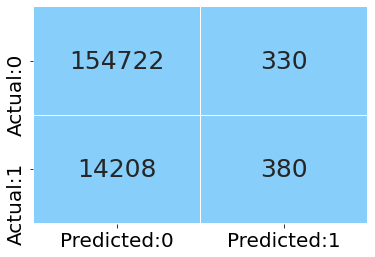

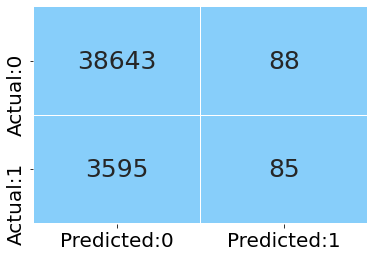

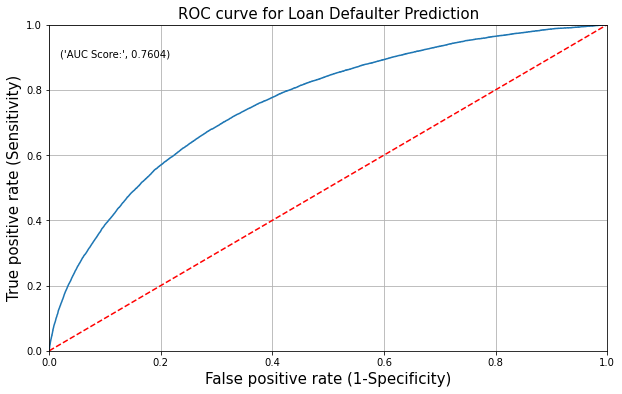

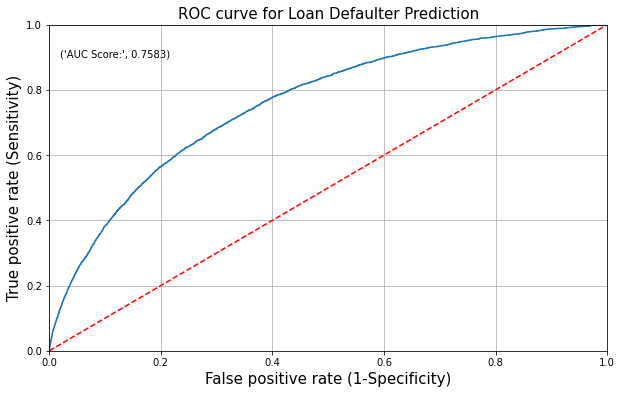

In [119]:
base_model_scores.loc['LR_Base_Model'] = build_model_pipeline(LogisticRegression(),
                                                        X,y,plot_graphs=True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>

From the above plot, we can see that our classifier (logistic regression) is failry above the dotted line; with the AUC score **0.7583**.

**Hence, this is a decent model at the moment and will require further feature reduction and model tuning to ehance it's performance.**

In [65]:
decision_tree.(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

<a id ='dt'></a>
## 7.2 Fitting Decision Tree Full Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    155052
           1       0.74      0.13      0.22     14588

    accuracy                           0.92    169640
   macro avg       0.83      0.56      0.59    169640
weighted avg       0.91      0.92      0.90    169640

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38731
           1       0.30      0.05      0.09      3680

    accuracy                           0.91     42411
   macro avg       0.61      0.52      0.52     42411
weighted avg       0.86      0.91      0.88     42411



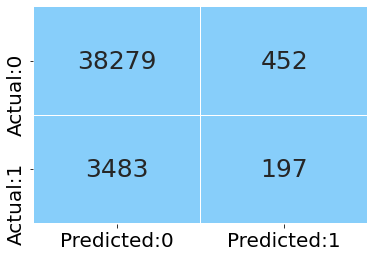

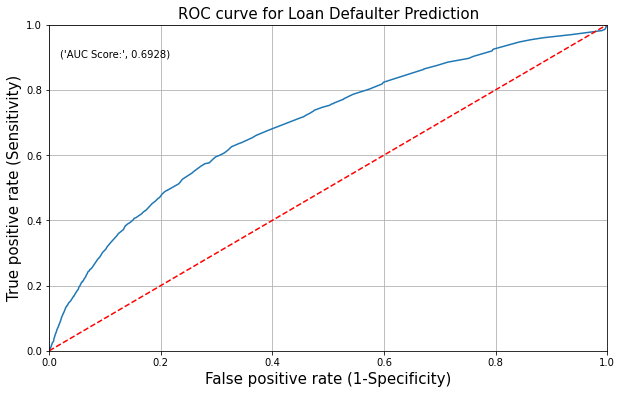

In [113]:
base_model_scores.loc['DT_Full_Model'] = build_model_pipeline(DecisionTreeClassifier(max_depth=10),
                                                        X,y,plot_graphs=True) 

<a id ='nb'></a>
## 7.3 Naive Bayes Full Model

In [78]:
from sklearn.naive_bayes import GaussianNB

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.95      0.53      0.69    155052
           1       0.13      0.73      0.22     14588

    accuracy                           0.55    169640
   macro avg       0.54      0.63      0.45    169640
weighted avg       0.88      0.55      0.65    169640

              precision    recall  f1-score   support

           0       0.95      0.54      0.69     38731
           1       0.13      0.73      0.22      3680

    accuracy                           0.55     42411
   macro avg       0.54      0.63      0.45     42411
weighted avg       0.88      0.55      0.65     42411



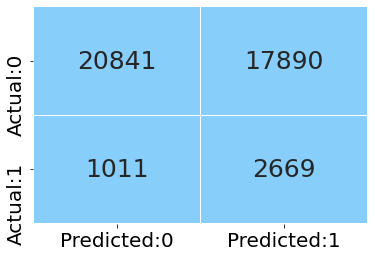

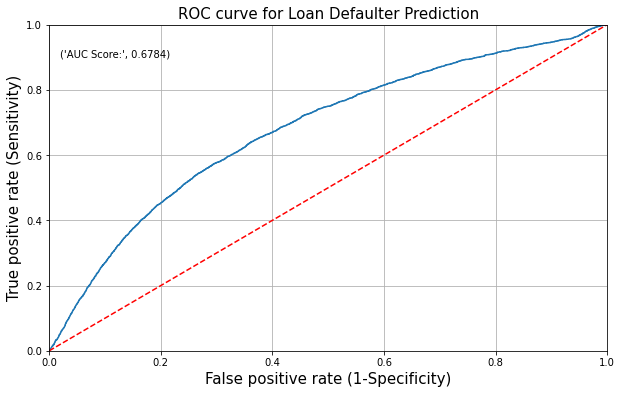

In [90]:
base_model_scores.loc['GNB_Full_Model'] = build_model_pipeline(GaussianNB(),
                                                        X,y,plot_graphs=True) 

<a id ='summary'></a>
## [7.4 Summary of Base Model and Full Model Performance](#home)

In [91]:
base_model_scores

,Accuracy_score,Recall_score,F1_score,ROC_AUC_Score
LR_Base_Model,0.913159,0.023098,0.044121,0.758278
DT_Full_Model,0.907524,0.052989,0.090445,0.691879
GNB_Full_Model,0.554337,0.725272,0.220224,0.678433


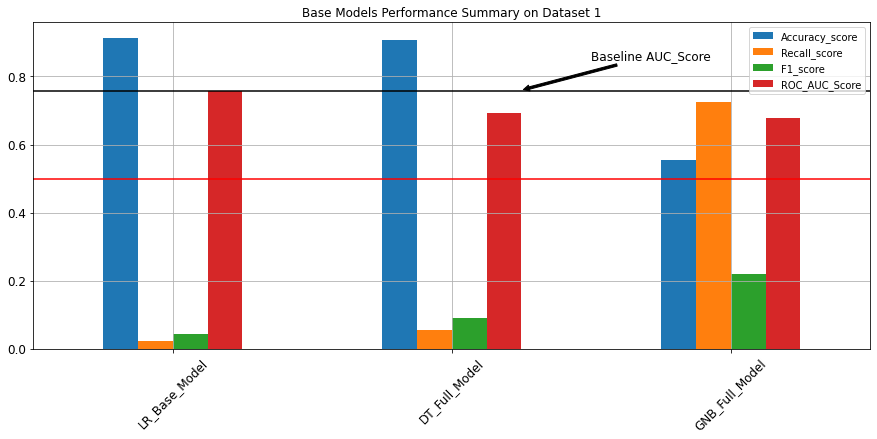

In [115]:
base_model_scores.plot(kind='bar', figsize=(15,6),title="Base Models Performance Summary on Dataset 1",fontsize=12)

plt.axhline(0.758278, color='black')
plt.axhline(0.5,color='r')
plt.xticks(rotation='45')

# annotations
plt.annotate(s = 'Baseline AUC_Score', xy = (1.25, 0.7599), xytext = (1.5, 0.85), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'),fontsize=12)

plt.grid()

plt.show()

<a id='base2'></a>
# [8. Building Base Model with Dataset 2:](#home)

<a id ='lr2'></a>
## 8.1 Logistic regression

In [130]:
df2 = df2.drop(df2[df2['INCOME_PER_PERSON']==np.inf].index,axis=0 )

In [131]:
df2 = df2.drop(df2[df2['PAYMENT_RATE']==np.inf].index,axis=0 )

In [132]:
df2.to_csv("cleaned_dataset_2_latest.csv")

In [133]:
X2,y2 = dataset_processing(df=df2, encoding='ohe', scaling='standard')

Shape of the Dataset Provided:  (92158, 139)
Standard Scaling Done...
Dummies Created...
Processed Datset Shape:  (92158, 154)


Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     68634
           1       0.53      0.01      0.03      5092

    accuracy                           0.93     73726
   macro avg       0.73      0.51      0.50     73726
weighted avg       0.90      0.93      0.90     73726

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17139
           1       0.70      0.02      0.04      1293

    accuracy                           0.93     18432
   macro avg       0.82      0.51      0.50     18432
weighted avg       0.92      0.93      0.90     18432



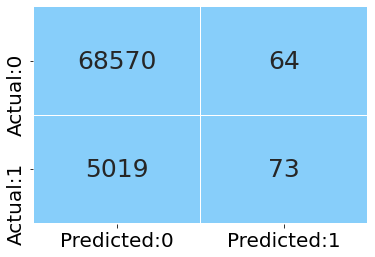

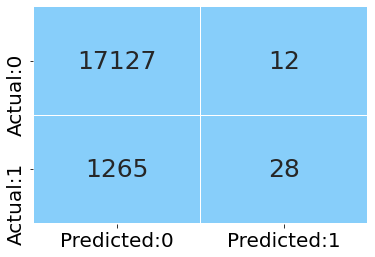

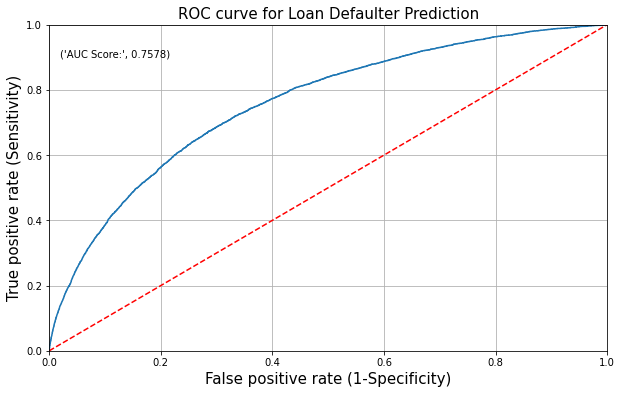

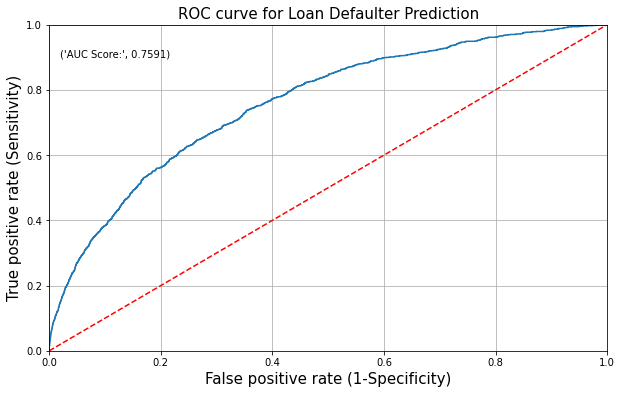

In [135]:
base_model_scores_2.loc['LR_Base_Model'] = build_model_pipeline(LogisticRegression(),
                                                        X2,y2,plot_graphs=True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>

From the above plot, we can see that our classifier (logistic regression) is failry above the dotted line; with the AUC score **0.7583**.

**Hence, this is a decent model at the moment and will require further feature reduction and model tuning to ehance it's performance.**

<a id ='dt2'></a>
## 8.2 Fitting Decision Tree Full Model

In [136]:
from sklearn.tree import DecisionTreeClassifier

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     68634
           1       0.86      0.16      0.27      5092

    accuracy                           0.94     73726
   macro avg       0.90      0.58      0.62     73726
weighted avg       0.94      0.94      0.92     73726

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     17139
           1       0.24      0.05      0.08      1293

    accuracy                           0.92     18432
   macro avg       0.58      0.52      0.52     18432
weighted avg       0.88      0.92      0.90     18432



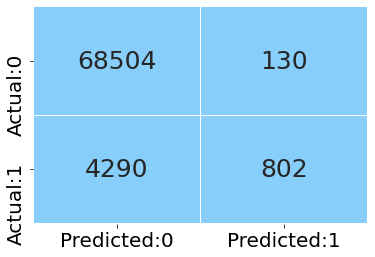

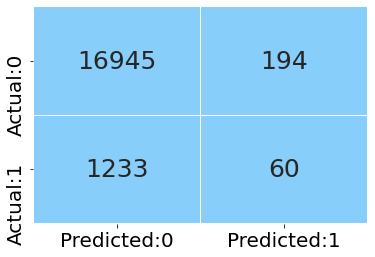

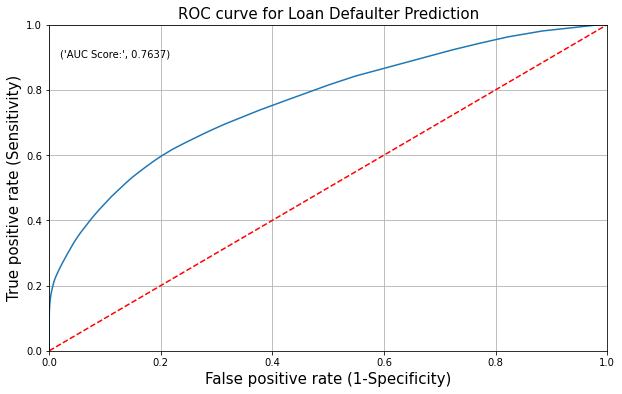

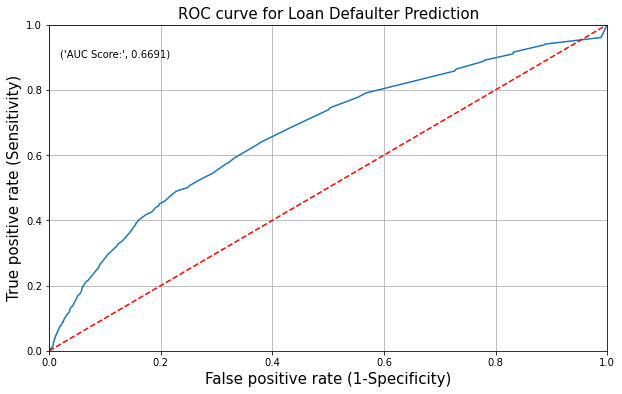

In [138]:
base_model_scores_2.loc['DT_Full_Model'] = build_model_pipeline(DecisionTreeClassifier(max_depth=10),
                                                        X2,y2,plot_graphs=True) 

<a id ='nb2'></a>
## 8.3 Naive Bayes Full Model

In [139]:
from sklearn.naive_bayes import GaussianNB

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     68634
           1       0.15      0.38      0.21      5092

    accuracy                           0.80     73726
   macro avg       0.55      0.61      0.55     73726
weighted avg       0.89      0.80      0.84     73726

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     17139
           1       0.15      0.38      0.21      1293

    accuracy                           0.81     18432
   macro avg       0.55      0.61      0.55     18432
weighted avg       0.89      0.81      0.84     18432



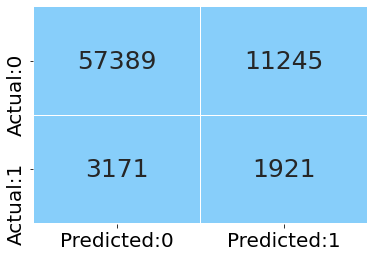

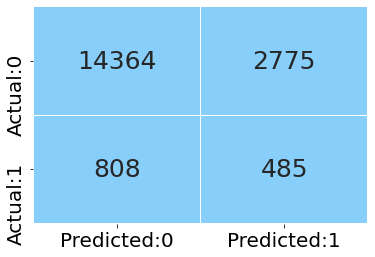

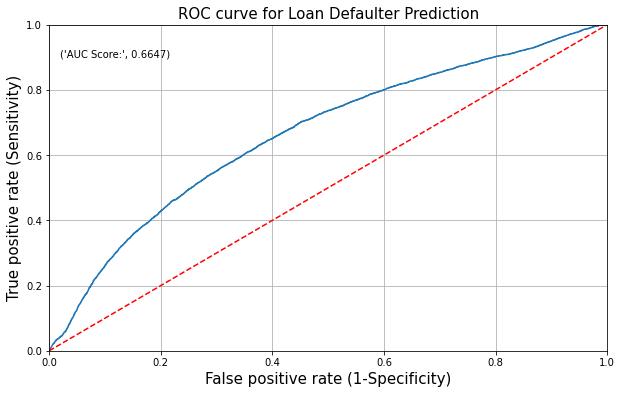

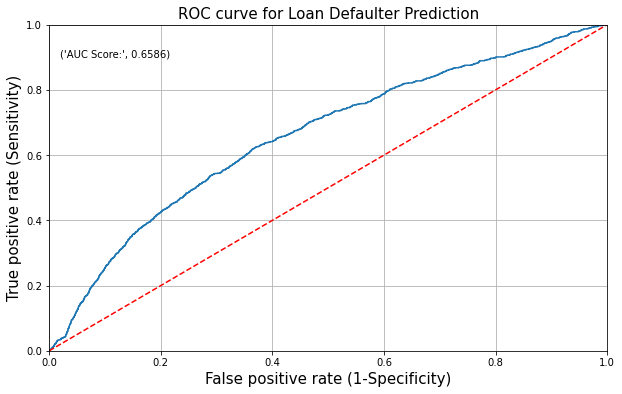

In [140]:
base_model_scores_2.loc['GNB_Full_Model'] = build_model_pipeline(GaussianNB(),
                                                        X2,y2,plot_graphs=True) 

<a id ='summary2'></a>
## [8.4 Summary of Base Model and Full Model Performance](#home)

In [141]:
base_model_scores_2

,Accuracy_score,Recall_score,F1_score,ROC_AUC_Score
LR_Base_Model,0.930718,0.021655,0.042011,0.759109
DT_Full_Model,0.922580,0.046404,0.077569,0.669088
GNB_Full_Model,0.805610,0.375097,0.213046,0.658596


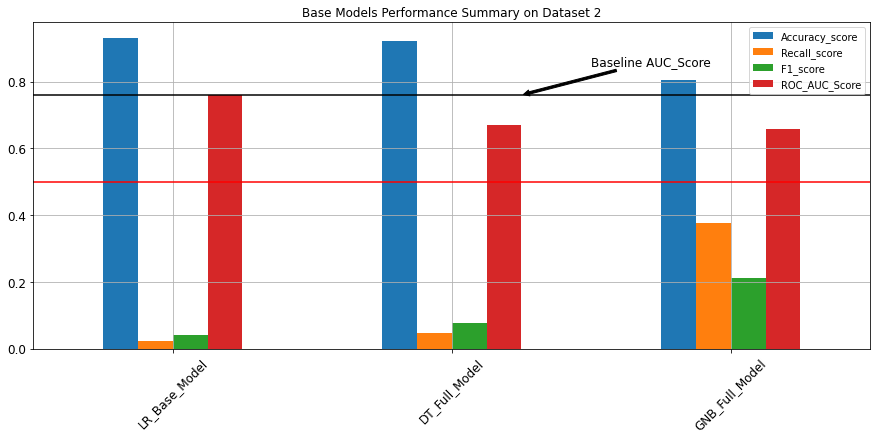

In [143]:
base_model_scores_2.plot(kind='bar', figsize=(15,6),title="Base Models Performance Summary on Dataset 2",fontsize=12)

plt.axhline(0.759109, color='black')
plt.axhline(0.5,color='r')
plt.xticks(rotation='45')

# annotations
plt.annotate(s = 'Baseline AUC_Score', xy = (1.25, 0.7599), xytext = (1.5, 0.85), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'),fontsize=12)

plt.grid()

plt.show()